Dataset source and description : [can be found here](https://www.dbs.ifi.lmu.de/research/outlier-evaluation/DAMI/semantic/Cardiotocography/Cardiotocography_22.html). The goal is to compare supervised and unsupervised methods for outlier detection

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 26.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, calinski_harabasz_score, silhouette_score
from scipy.spatial.distance import pdist, mahalanobis, squareform
from sklearn.svm import OneClassSVM, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
import plotly.express as px
import matplotlib.pyplot as plt
import sweetviz as sv

In [ ]:
uploaded = files.upload()

Saving Cardiotocography.csv to Cardiotocography.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Cardiotocography.csv']))


In [ ]:
df.head()


id        LB        AC        FM        UC      ASTV      MSTV  \
0  1881.0  0.592593  0.000000  0.000000  0.294118  0.633803  0.338235   
1   421.0  0.574074  0.038462  0.000000  0.000000  0.816901  0.029412   
2    92.0  0.777778  0.000000  0.000000  0.000000  0.774648  0.029412   
3  1767.0  0.259259  0.000000  0.000000  0.294118  0.704225  0.191176   
4  1880.0  0.592593  0.000000  0.001773  0.294118  0.633803  0.352941   

       ALTV      MLTV        DL  ...       Min       Max      Nmax  Nzeros  \
0  0.000000  0.013807  0.500000  ...  0.045872  0.336207  0.333333     0.1   
1  0.527473  0.092702  0.000000  ...  0.770642  0.672414  0.166667     0.0   
2  0.736264  0.096647  0.000000  ...  0.816514  0.275862  0.222222     0.0   
3  0.000000  0.183432  0.428571  ...  0.174312  0.275862  0.222222     0.1   
4  0.000000  0.013807  0.428571  ...  0.045872  0.336207  0.333333     0.1   

       Mode      Mean    Median  Variance  Tendency  outlier  
0  0.485149  0.247423  0.284091  0.638418       1.0   b'yes'  
1  0.534653  0.587629  0.511364  0.016949       0.0   b'yes'  
2  0.633663  0.659794  0.602273  0.000000       1.0   b'yes'  
3  0.000000  0.164948  0.000000  0.361582       0.0   b'yes'  
4  0.485149  0.226804  0.272727  0.683616       1.0   b'yes'  

[5 rows x 23 columns]

In [ ]:
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


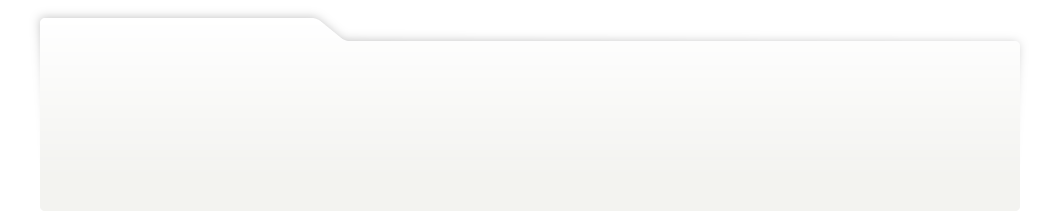
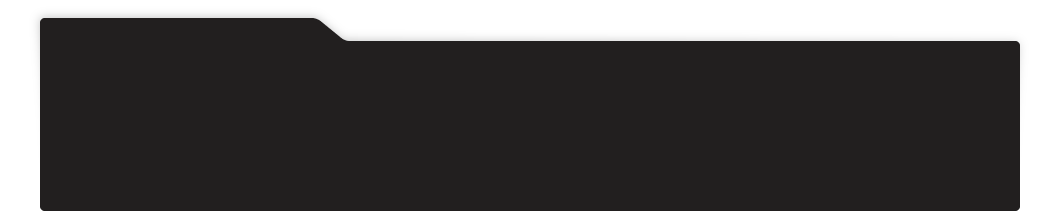
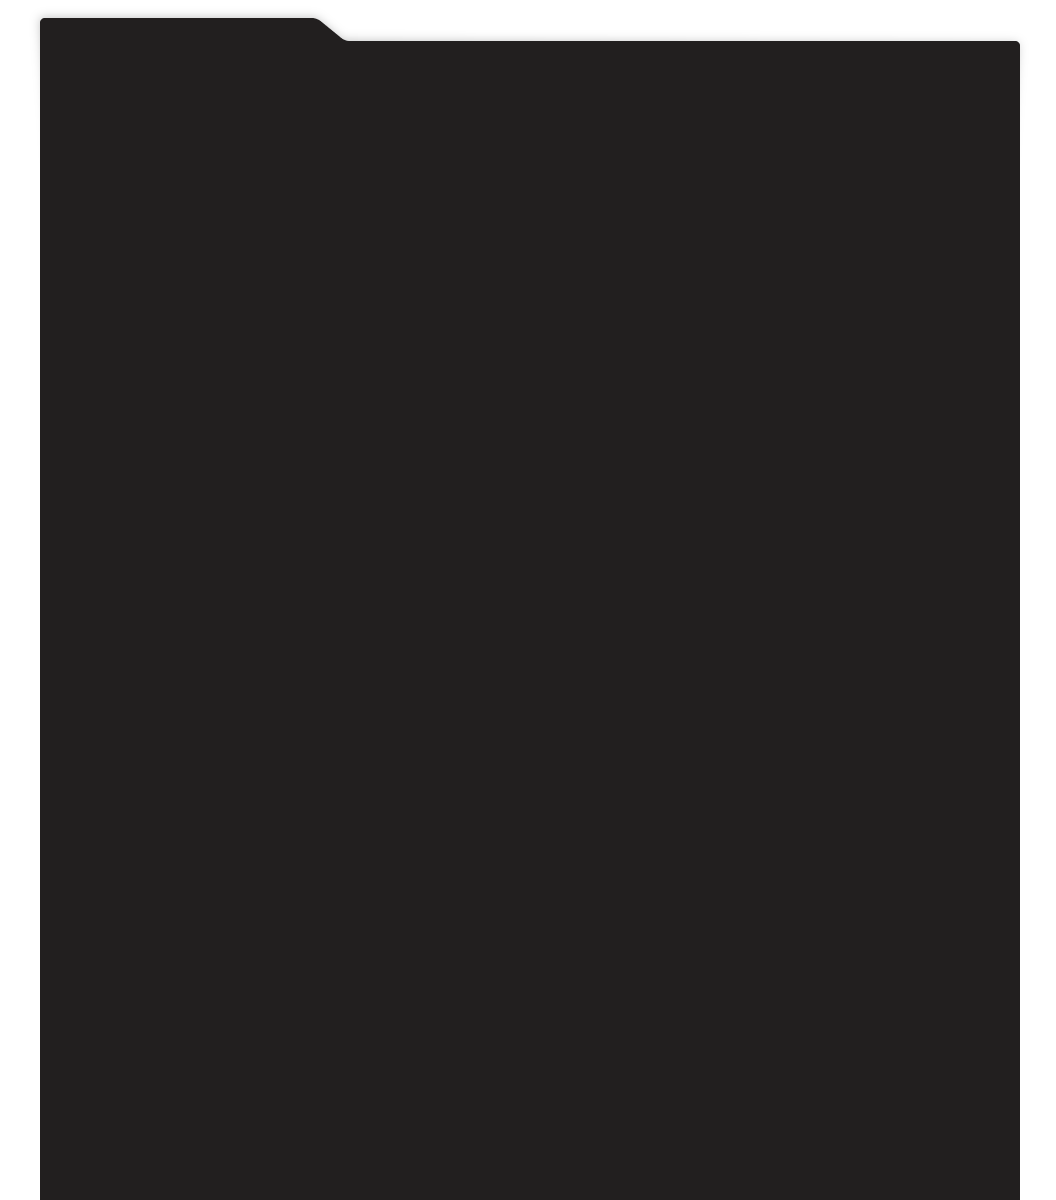
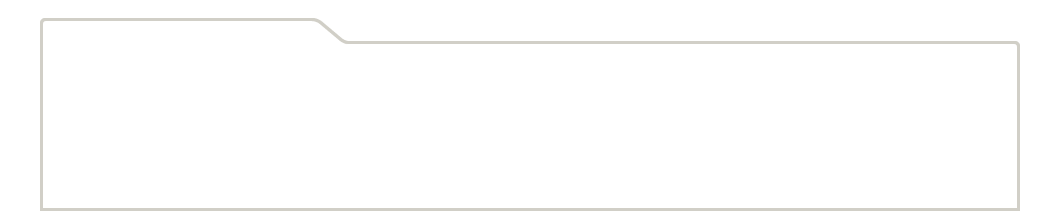
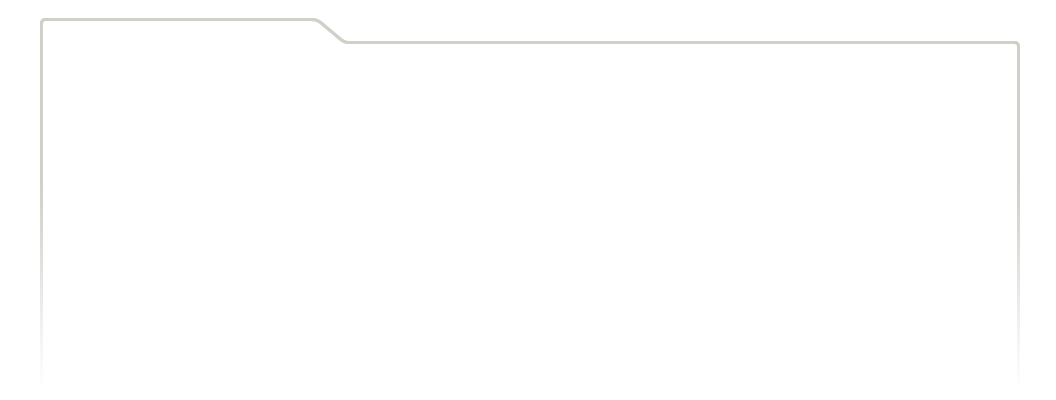
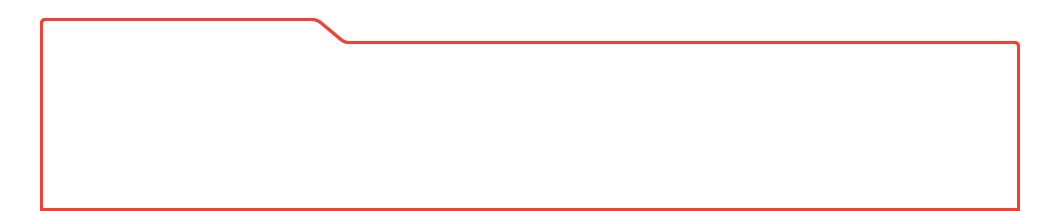
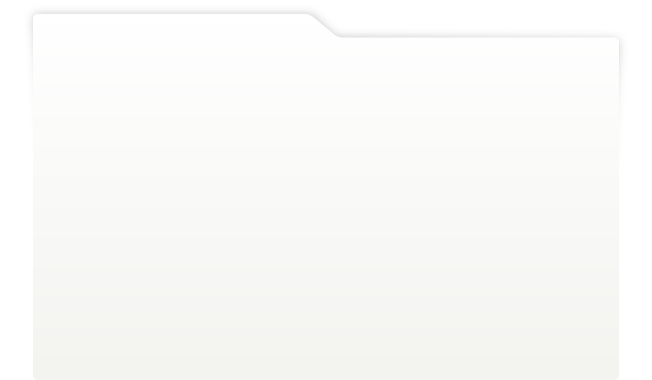
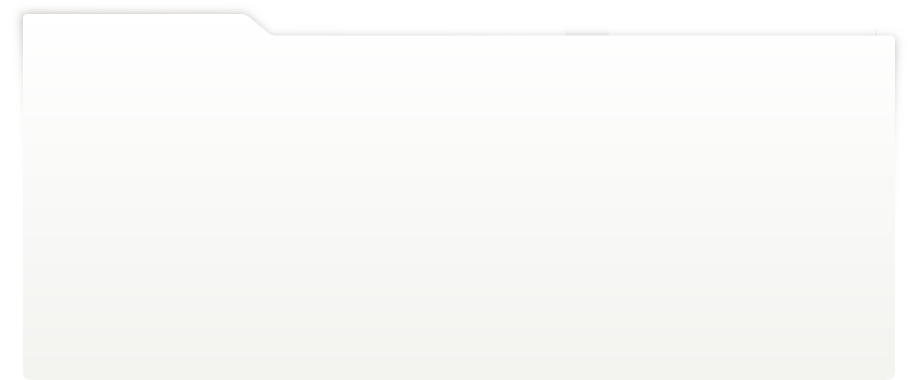
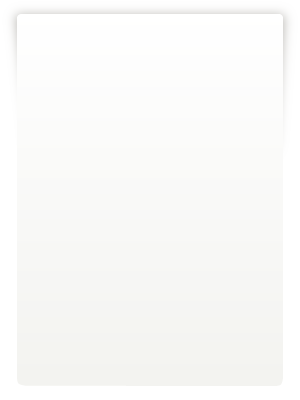
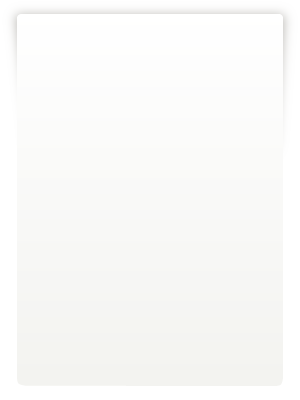
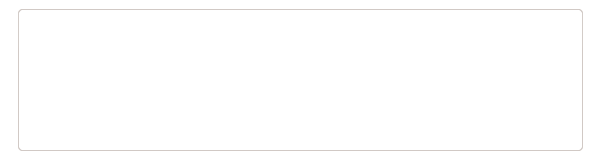
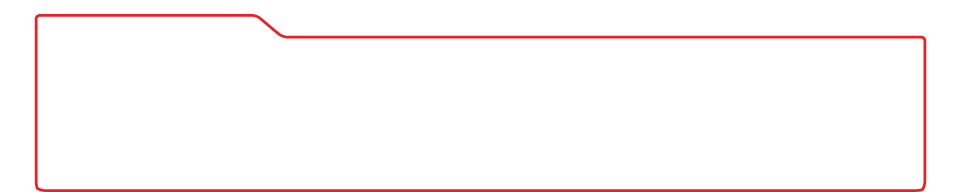
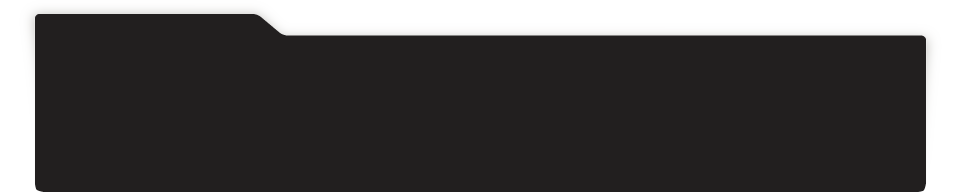
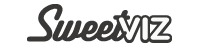
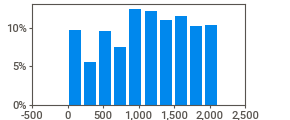
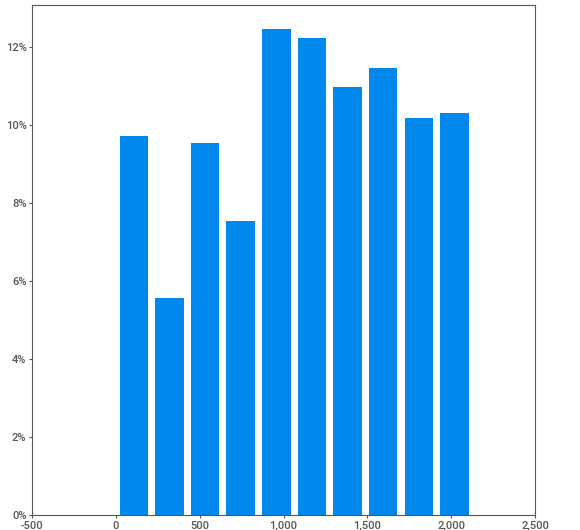
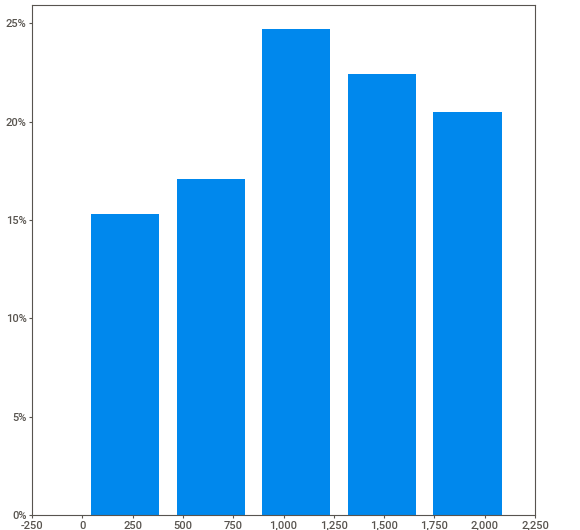
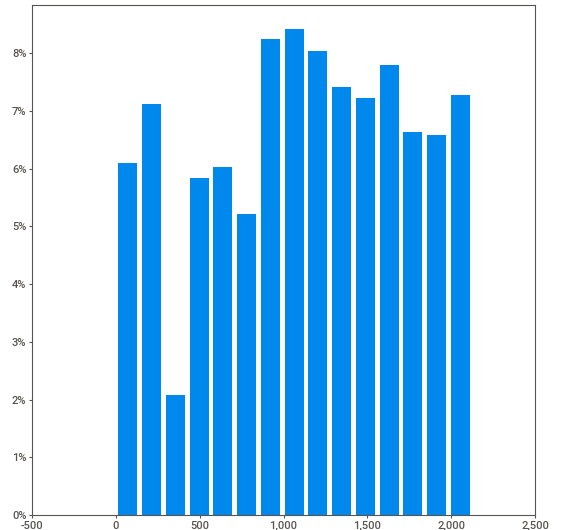
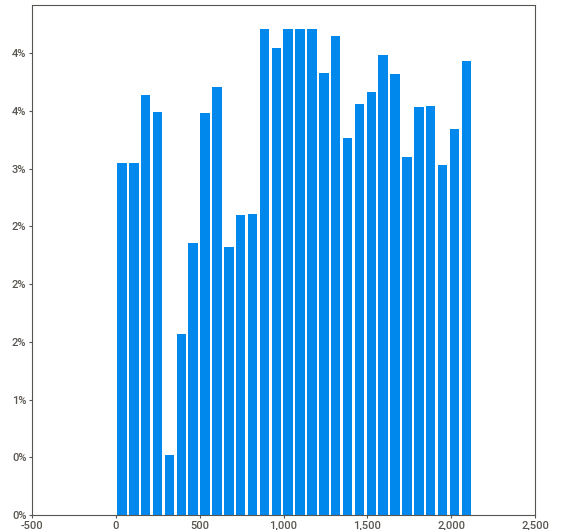
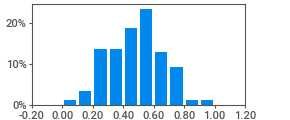
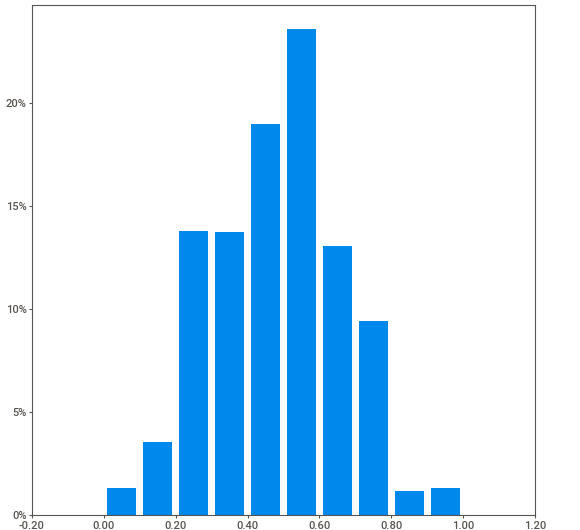
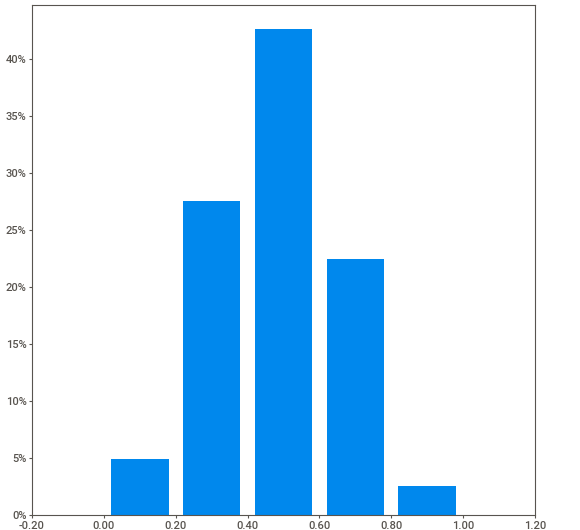
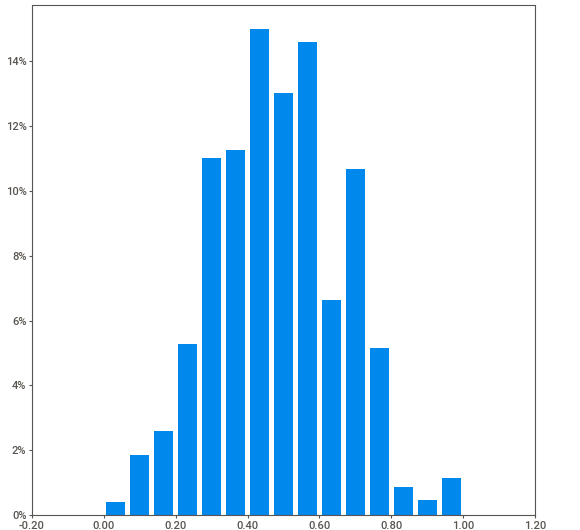
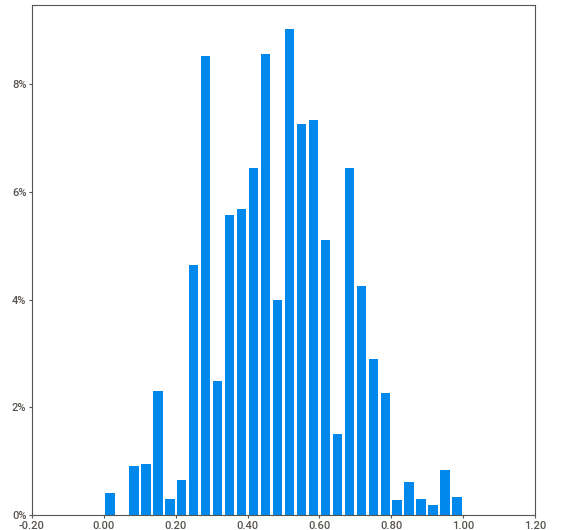
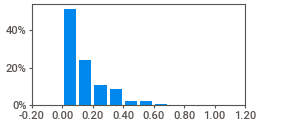
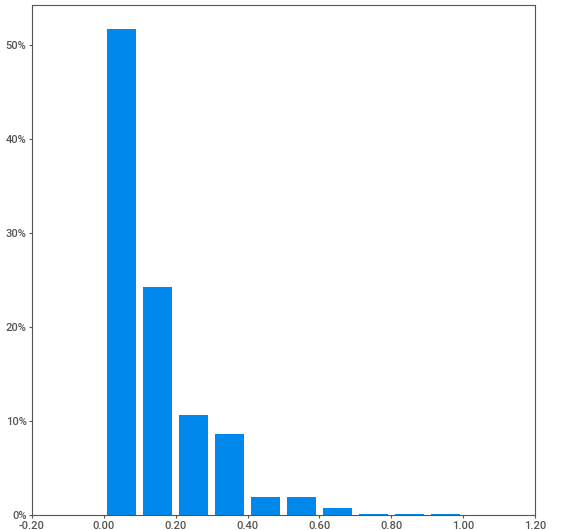
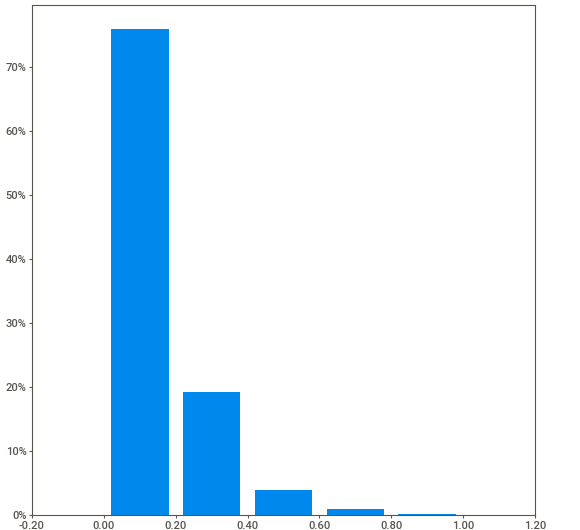
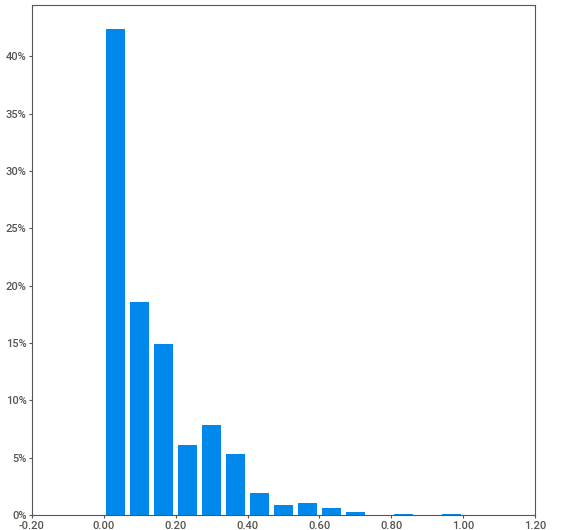
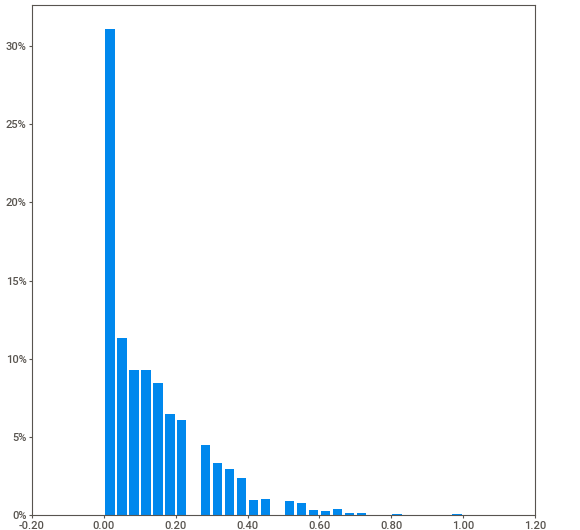
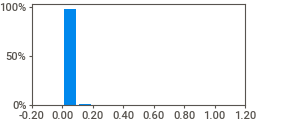
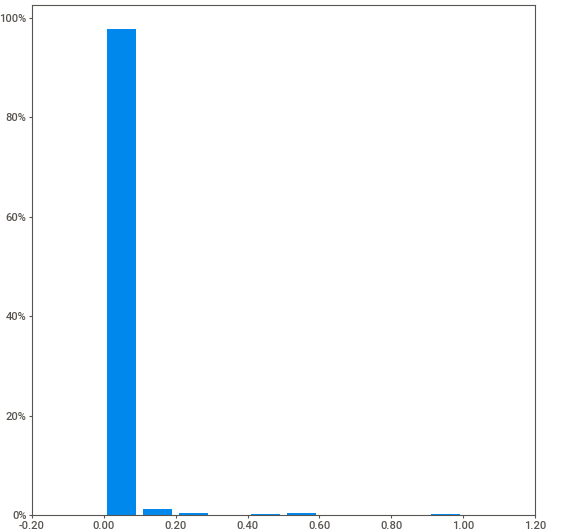
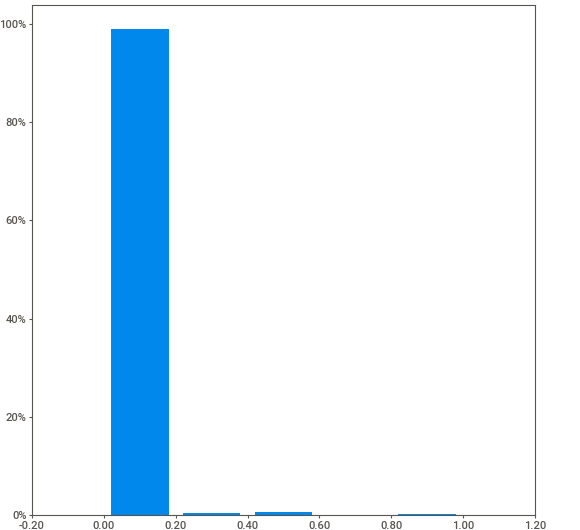
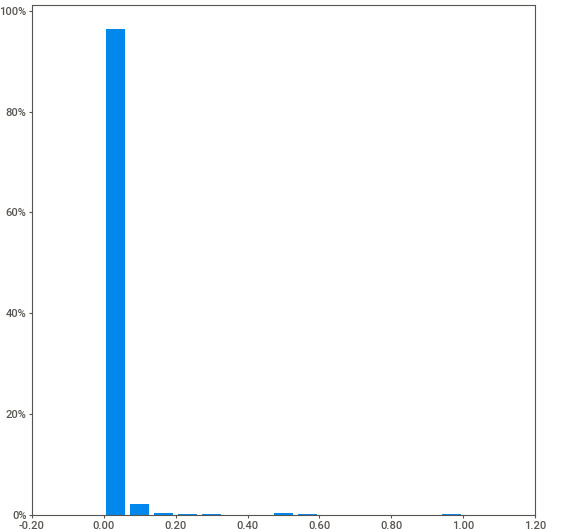
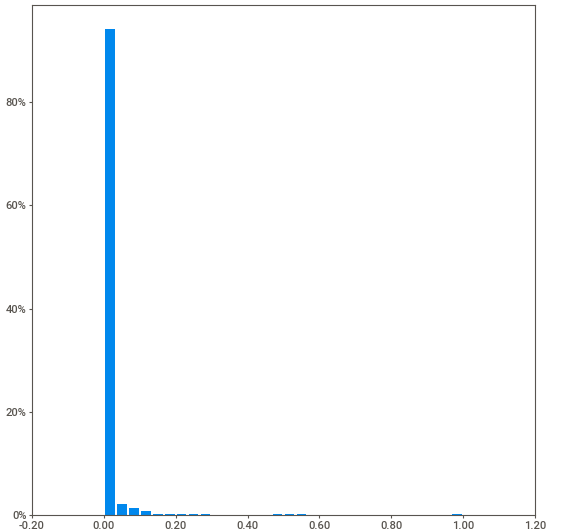
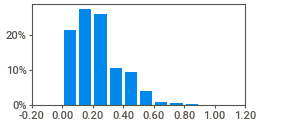
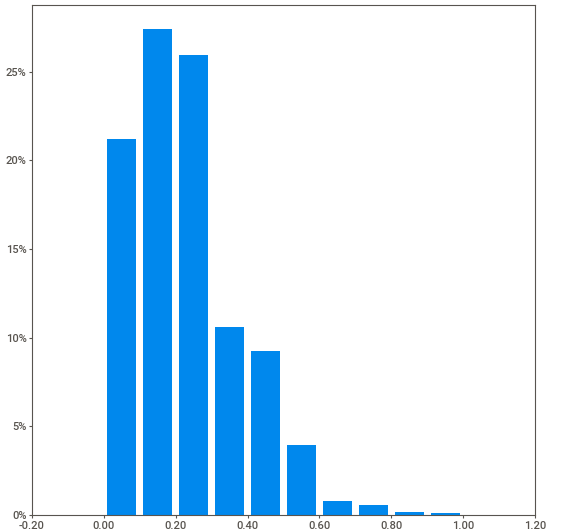
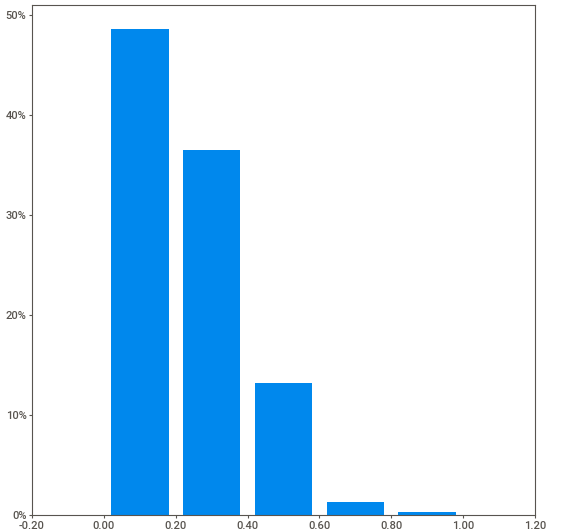
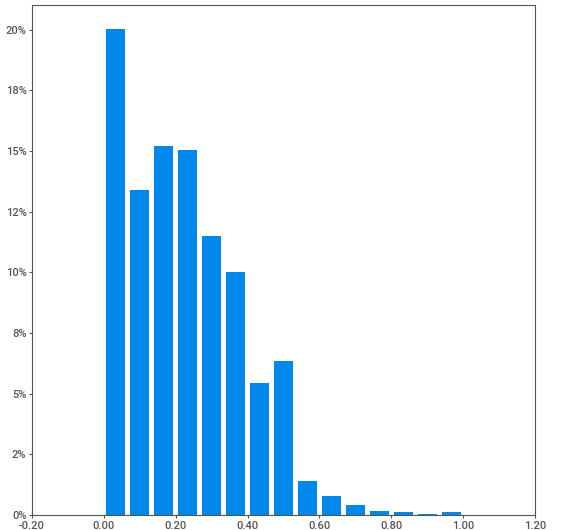
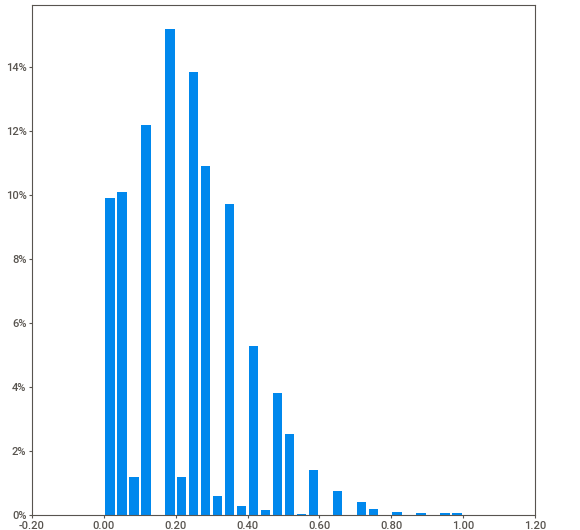
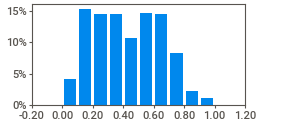
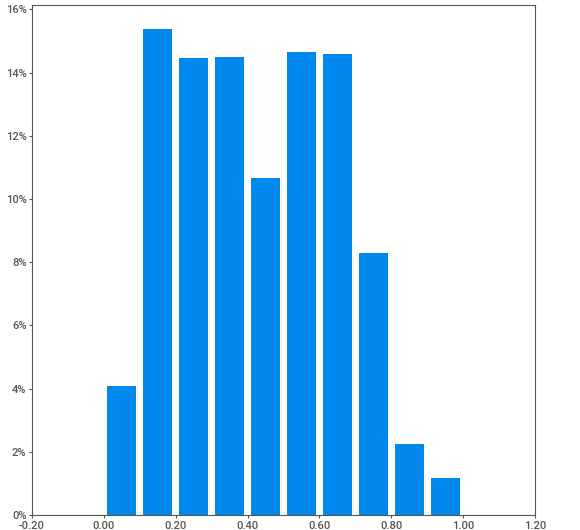
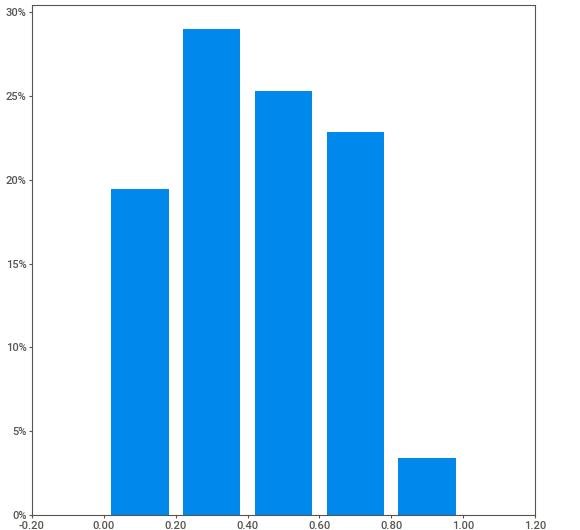
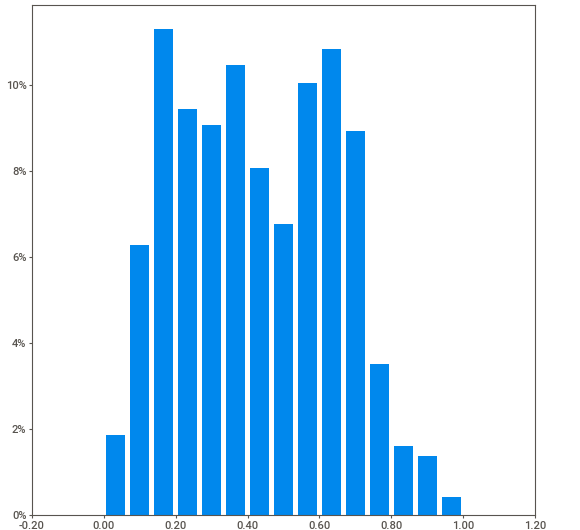
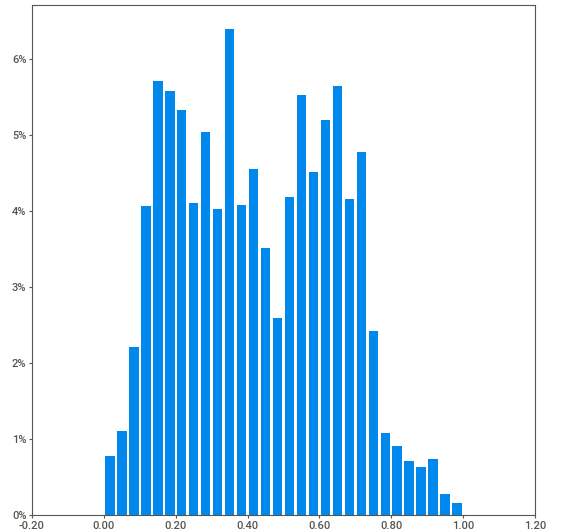
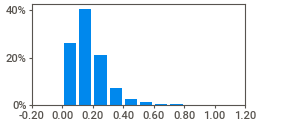
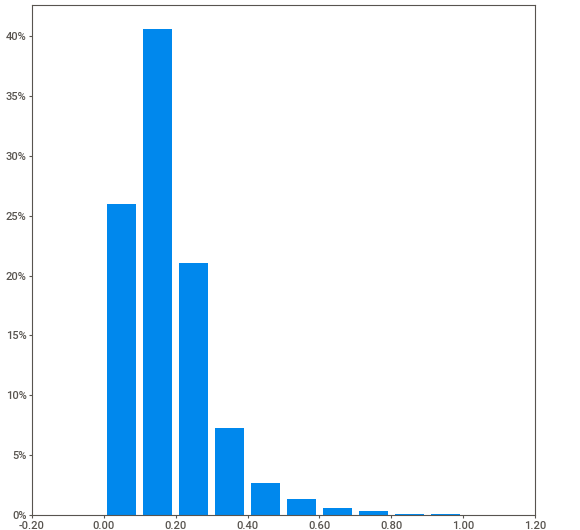
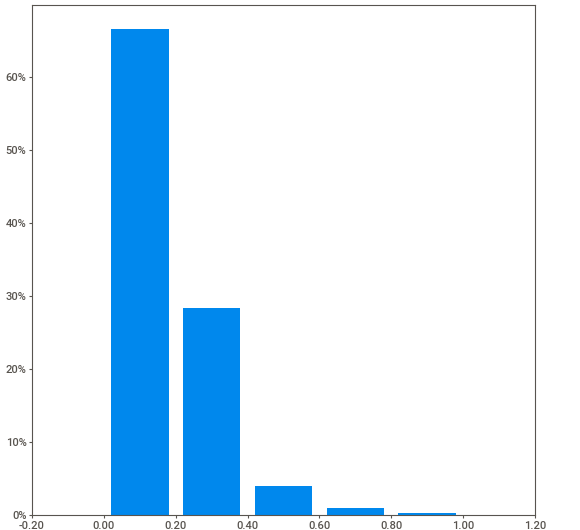
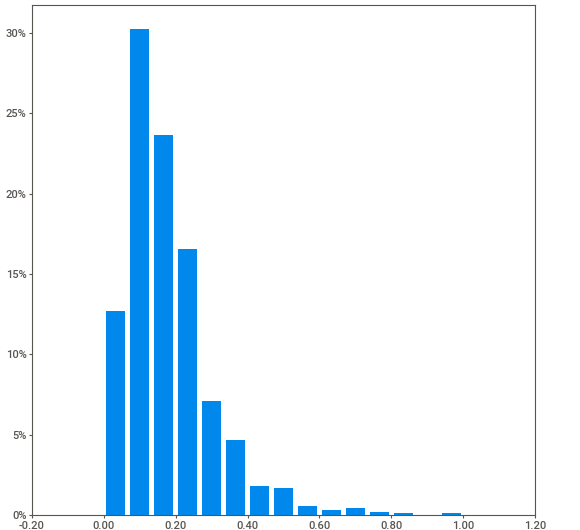
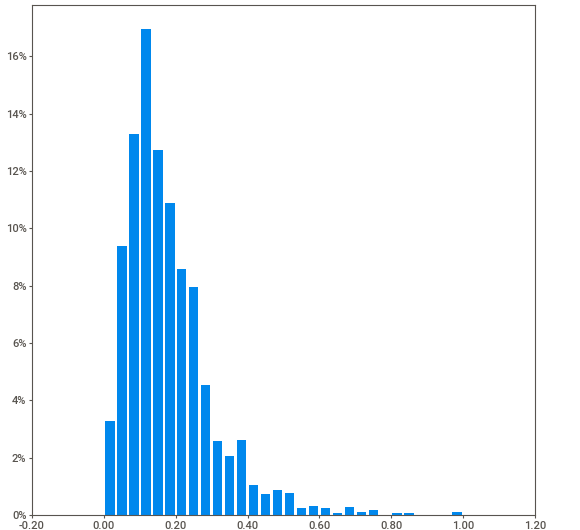
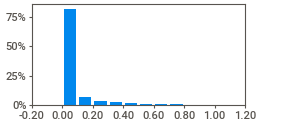
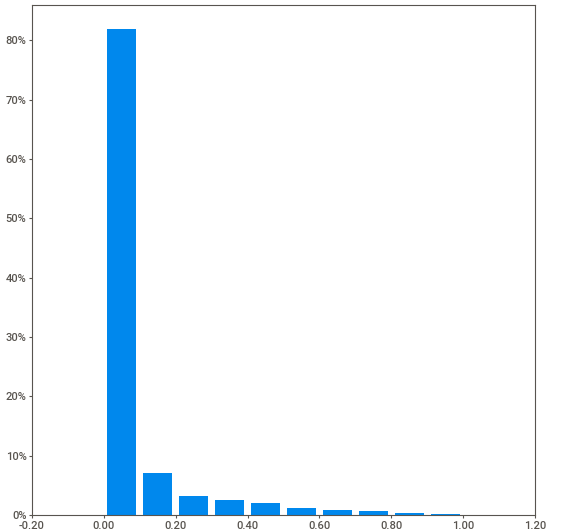
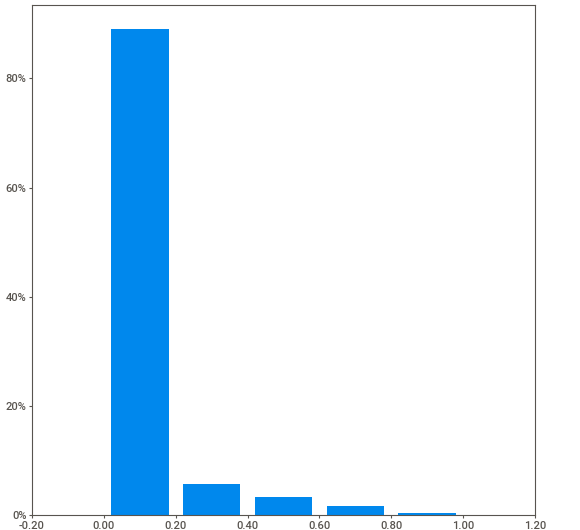
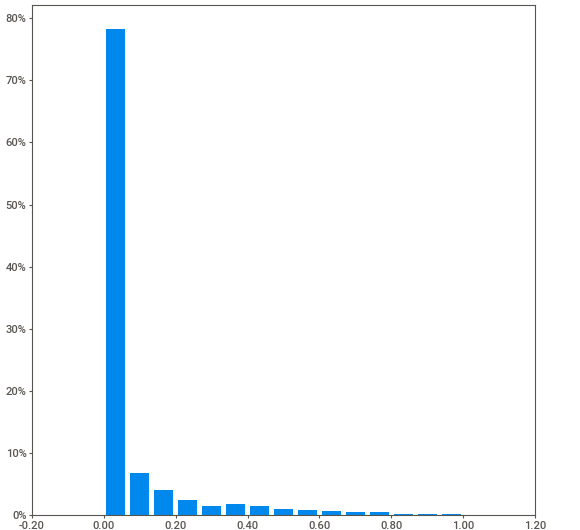
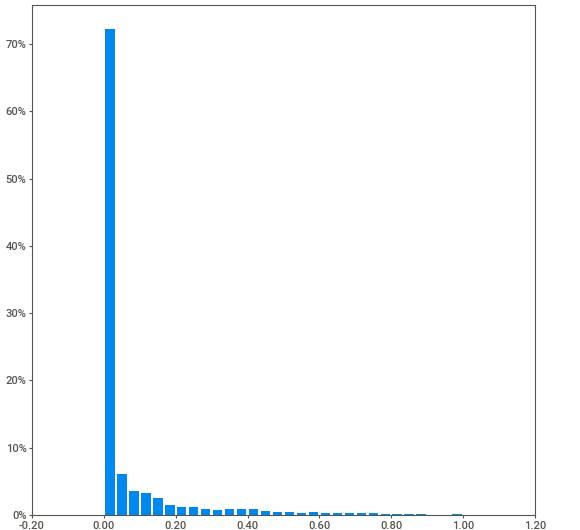
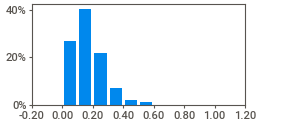
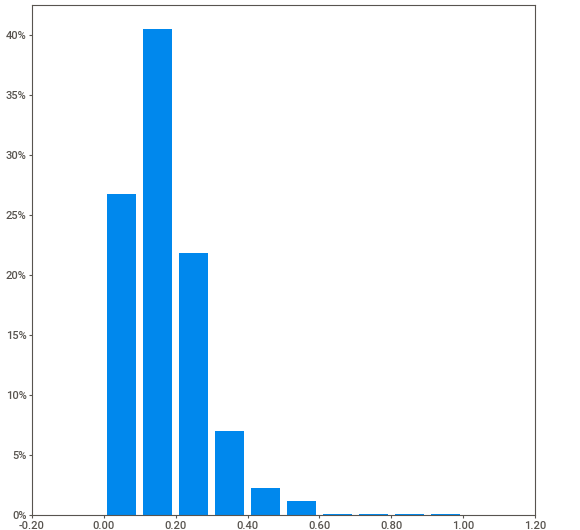
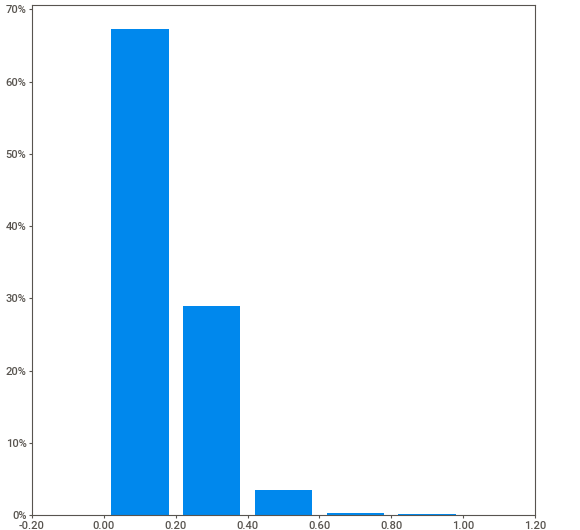
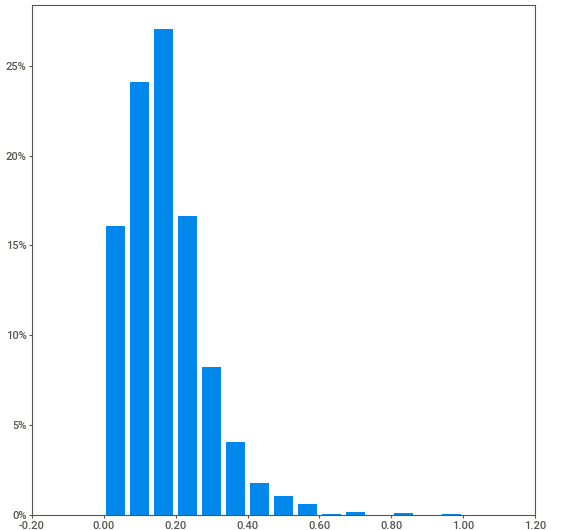
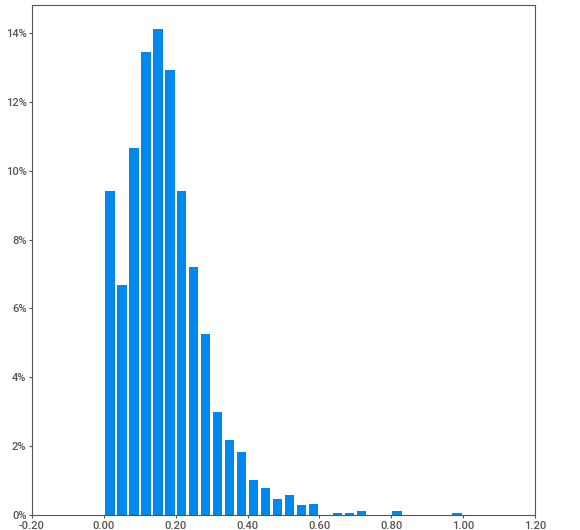
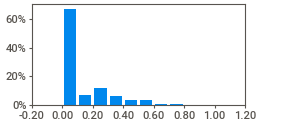
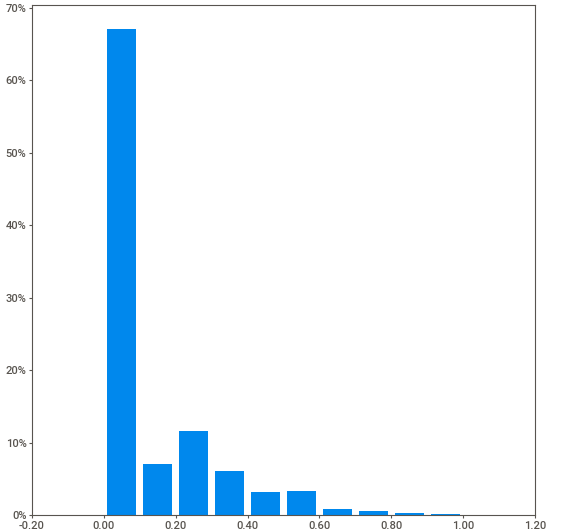
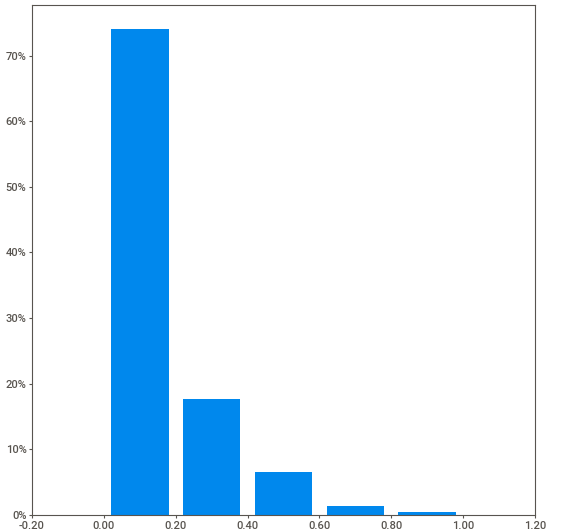
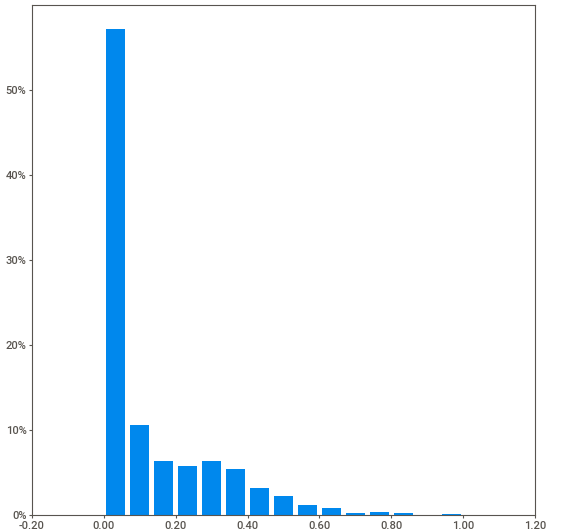
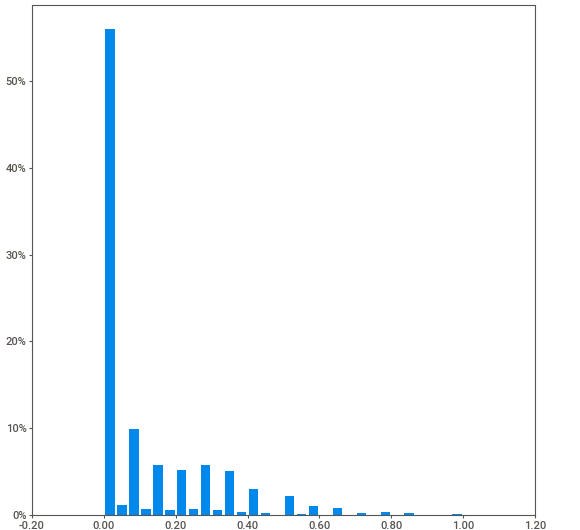
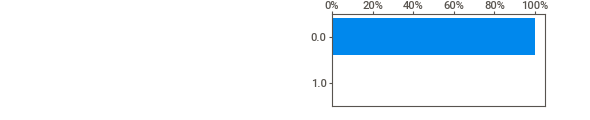
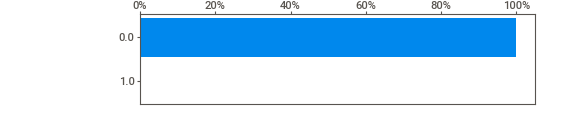
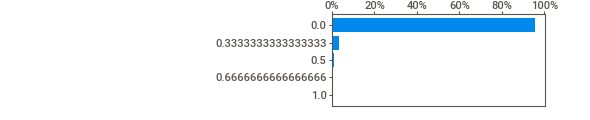
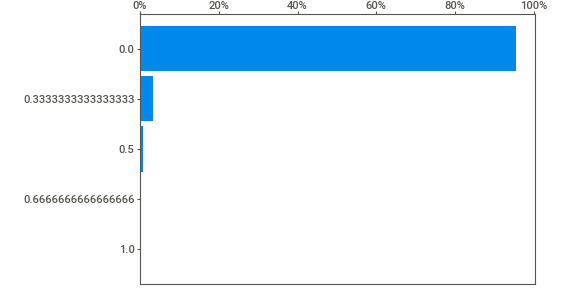
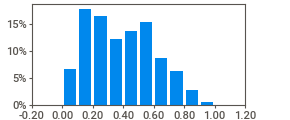
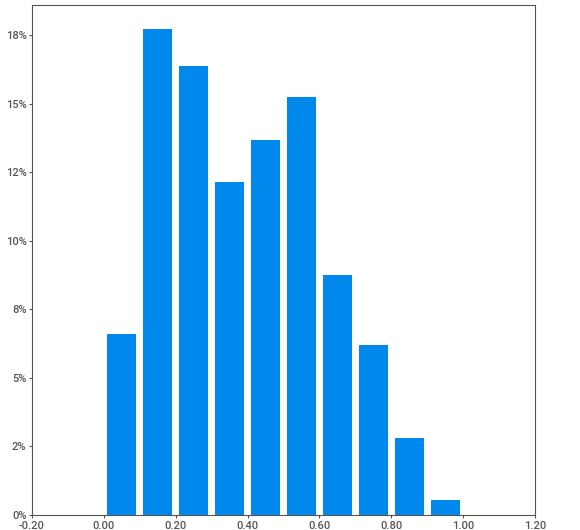
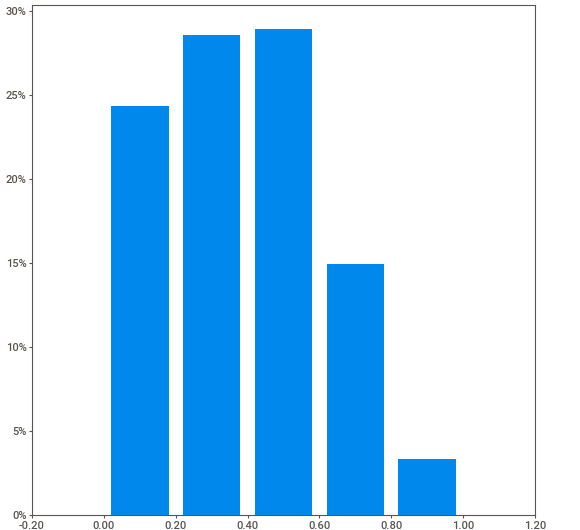
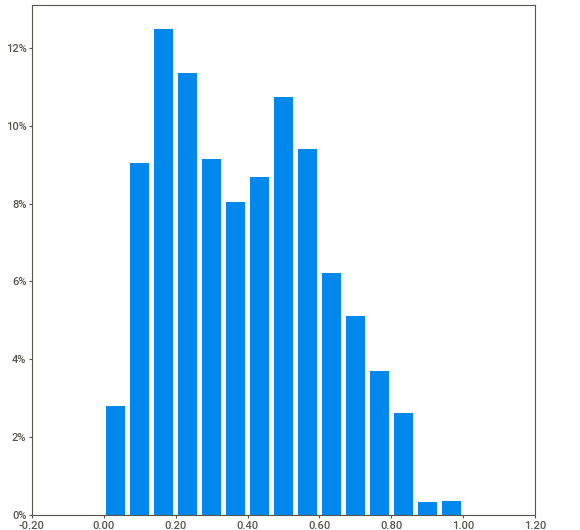
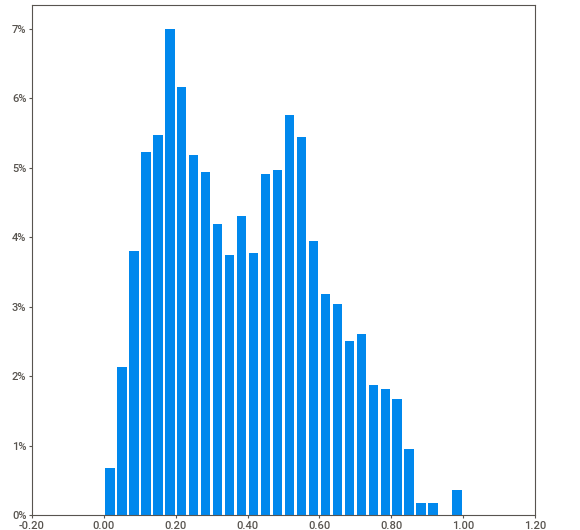
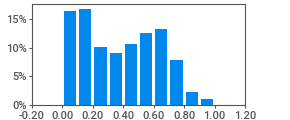
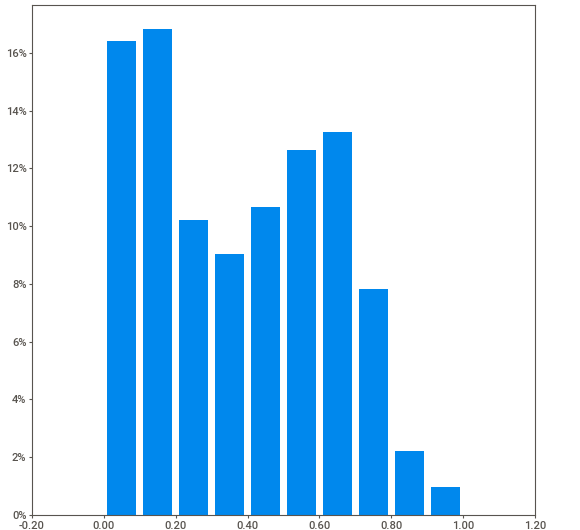
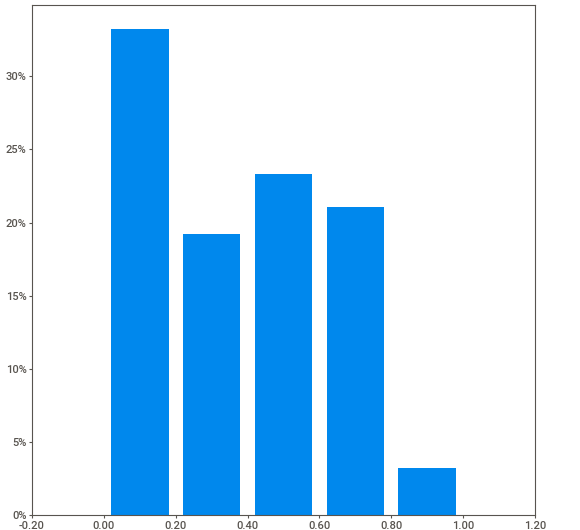
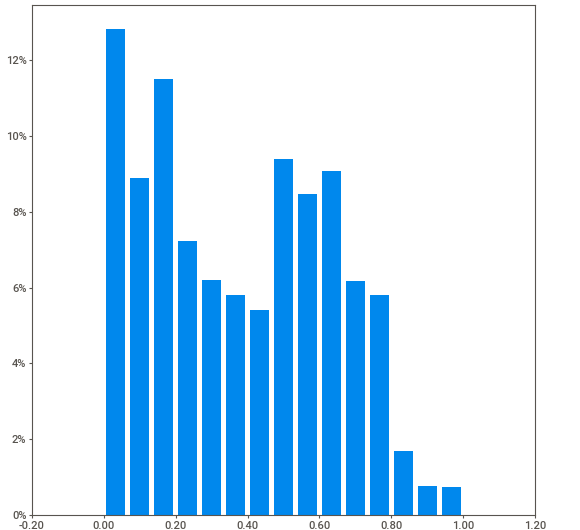
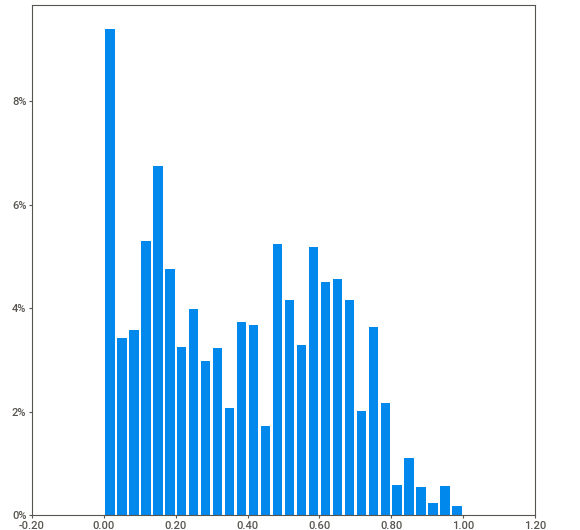
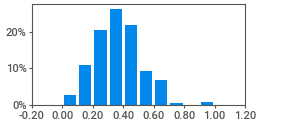
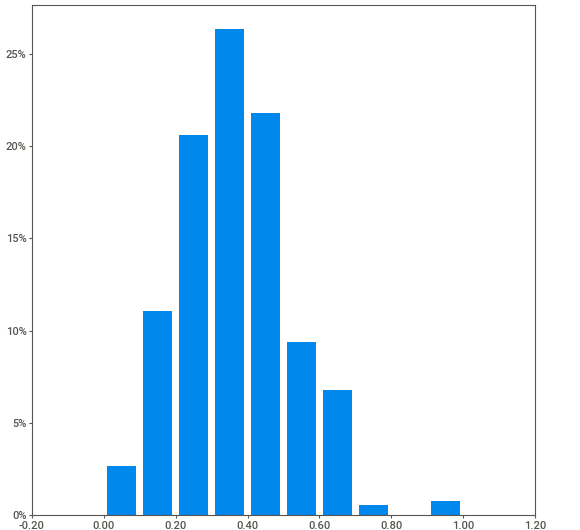
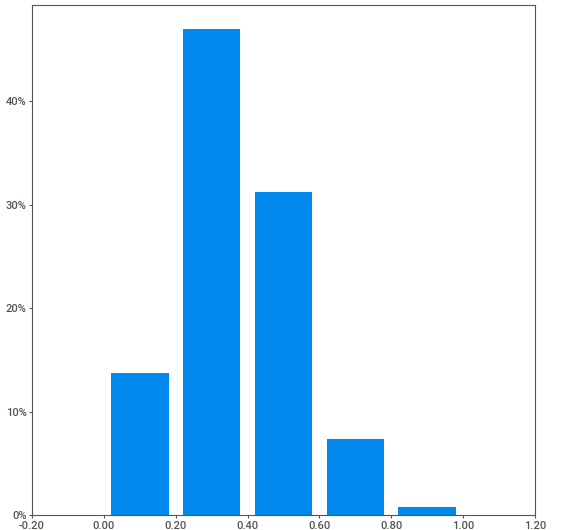
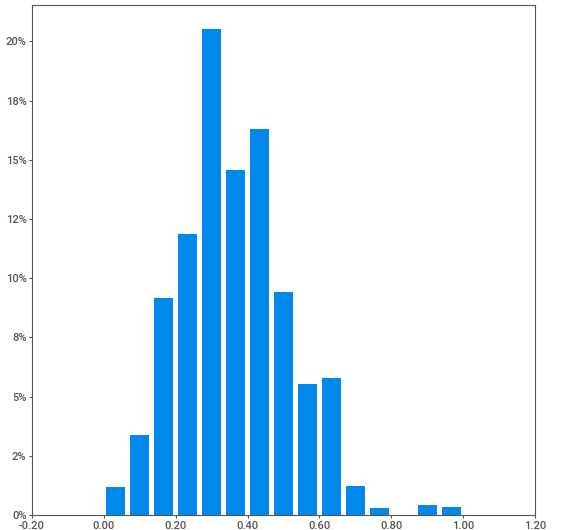
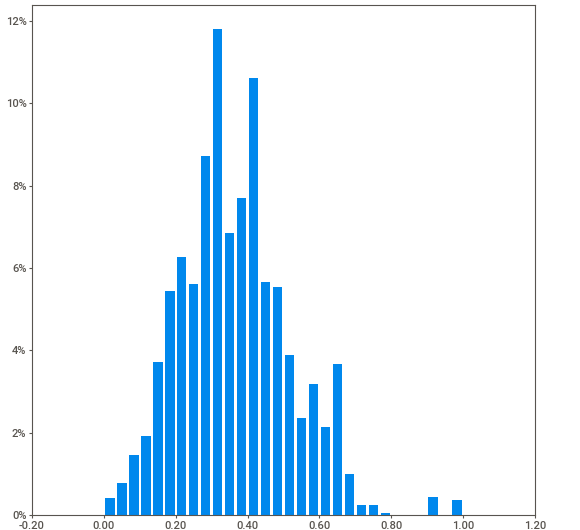
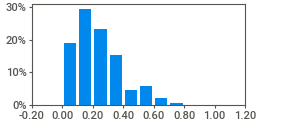
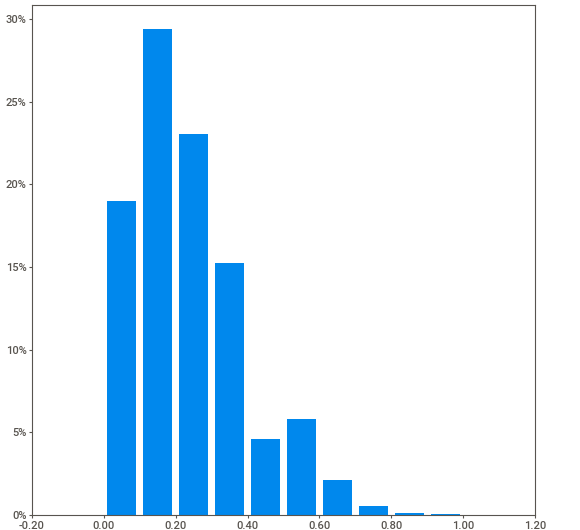
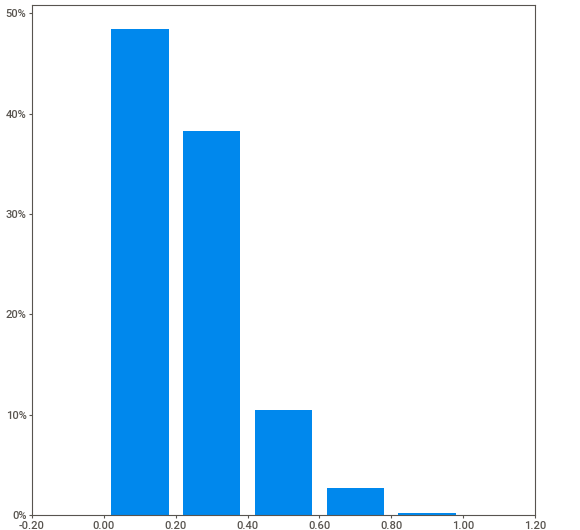
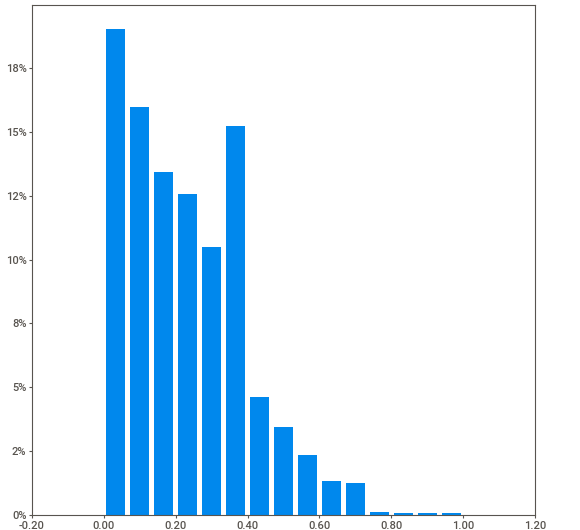
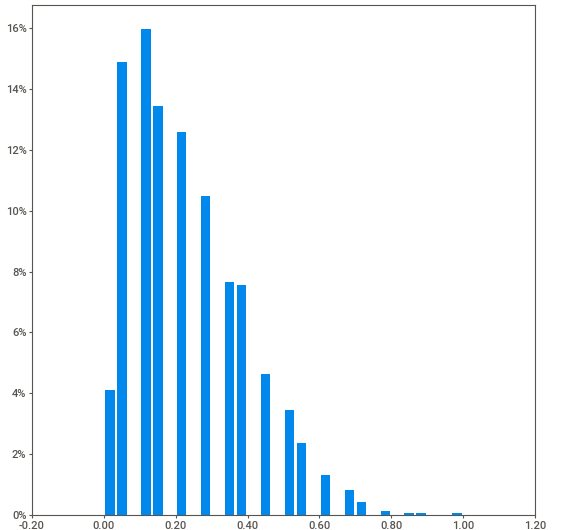
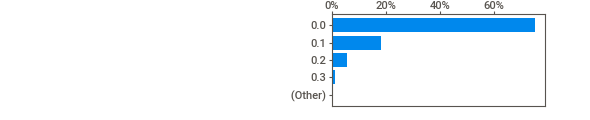
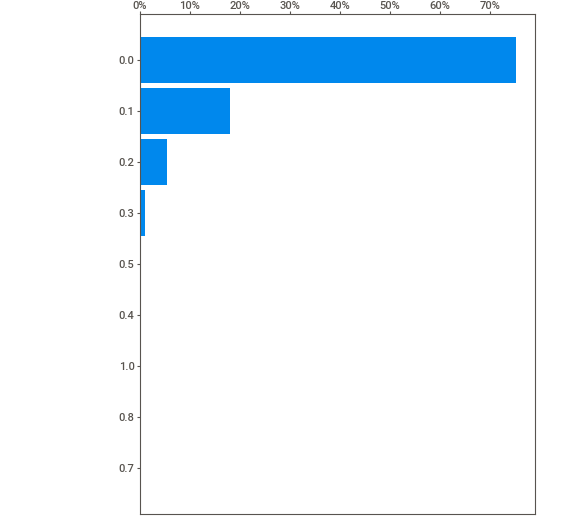
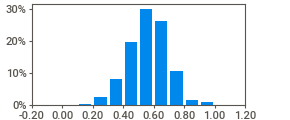
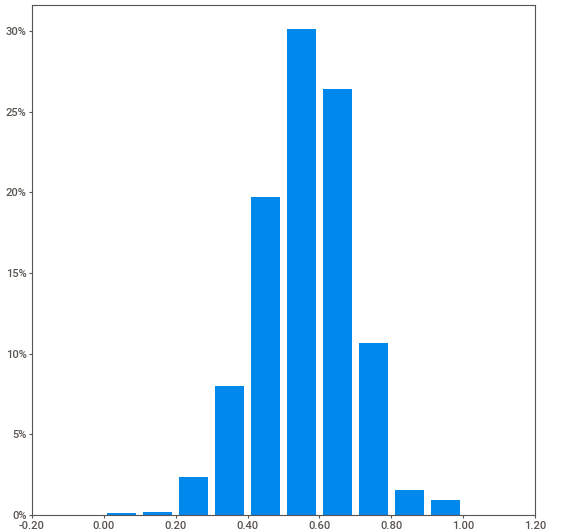
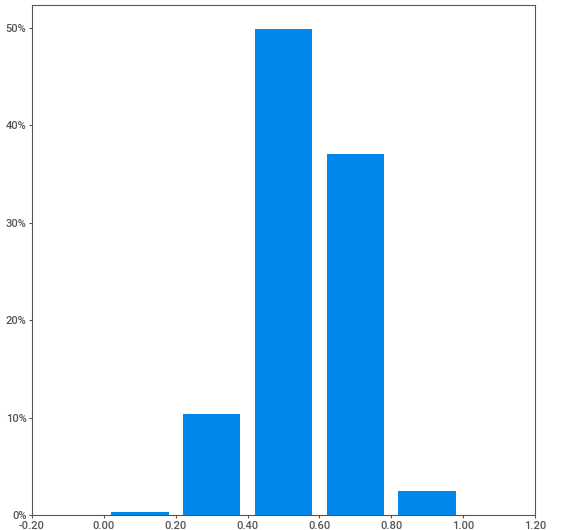
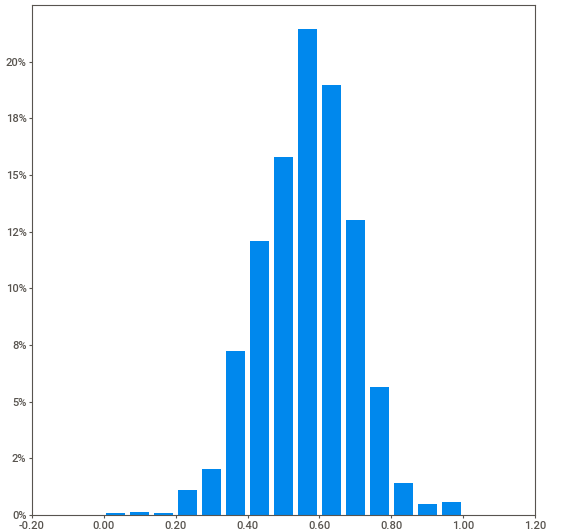
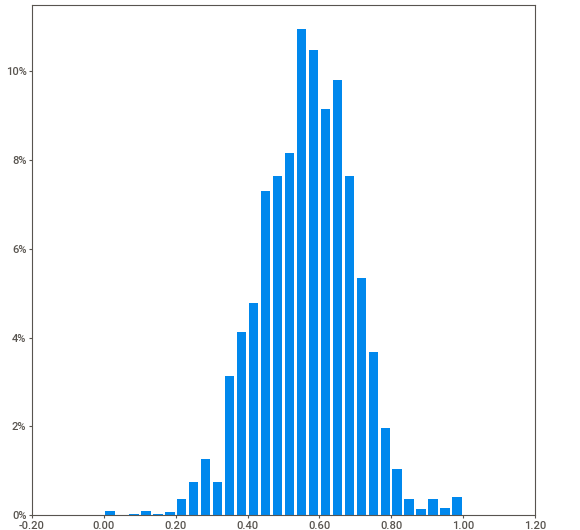
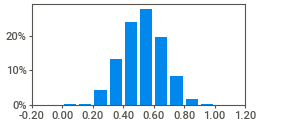
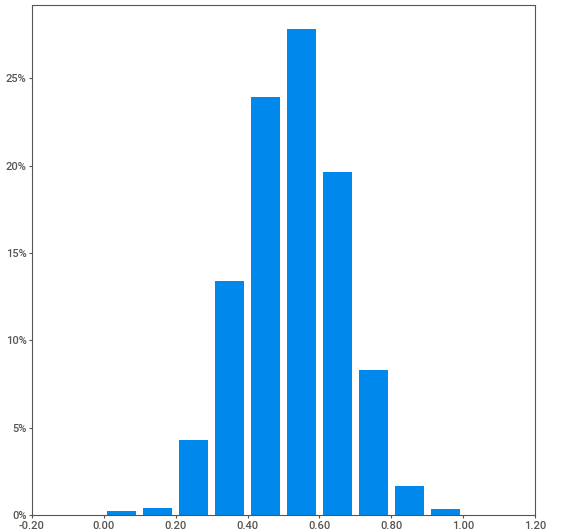
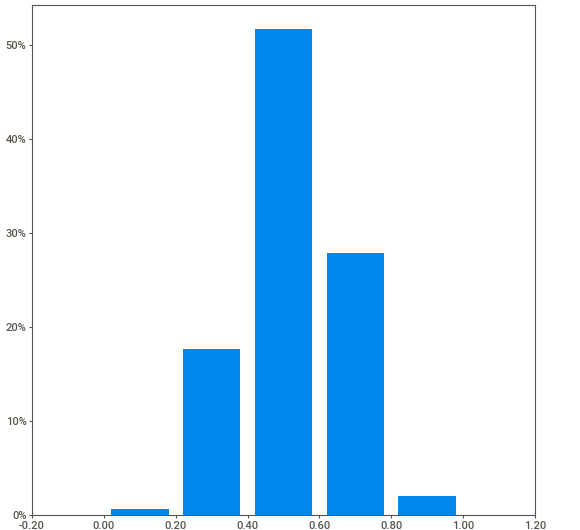
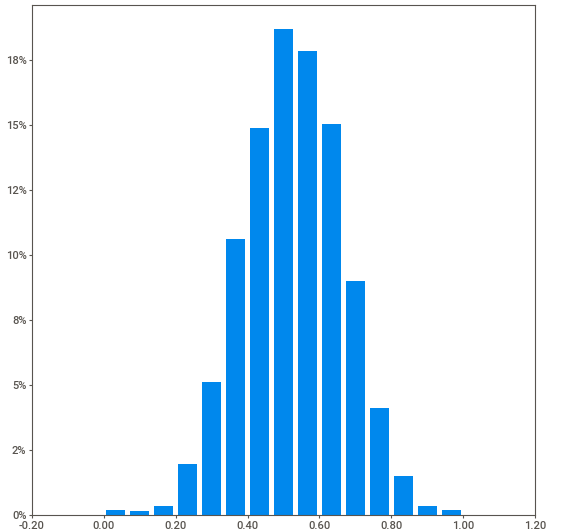
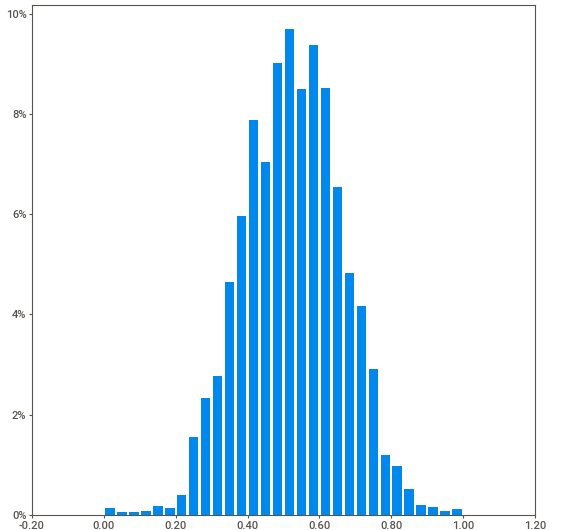
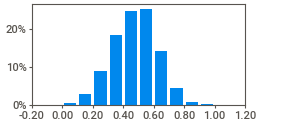
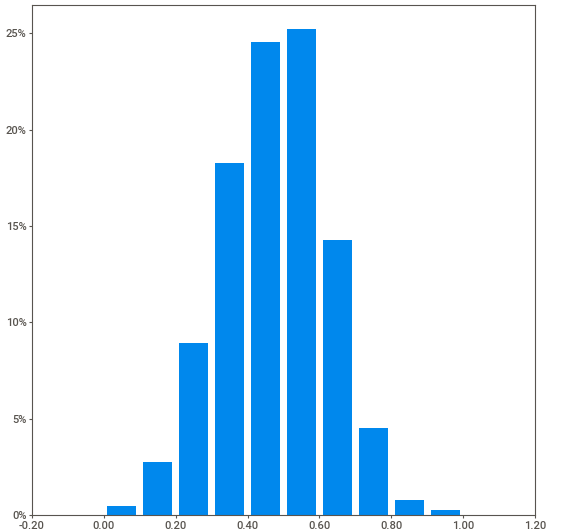
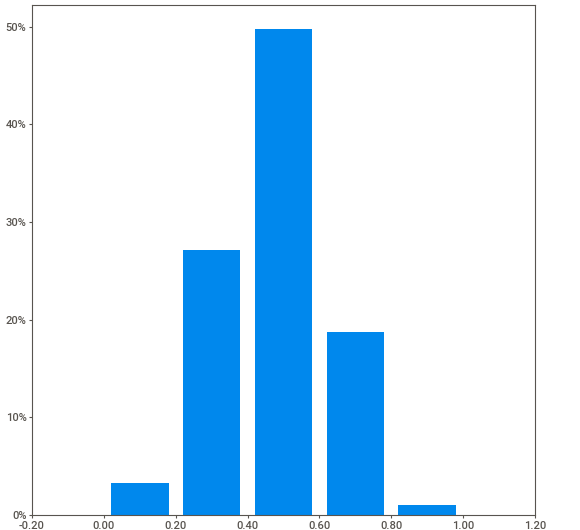
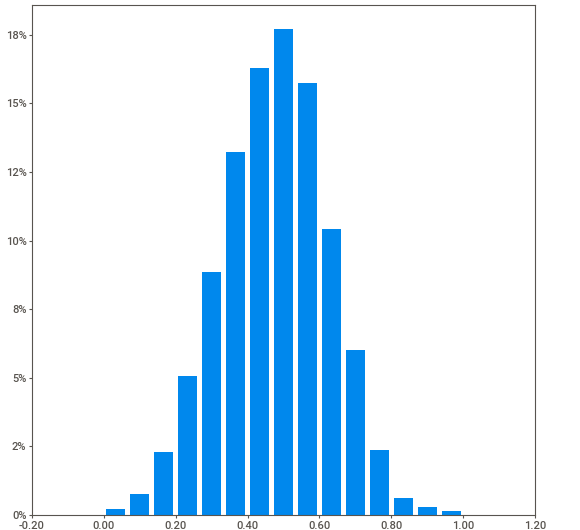
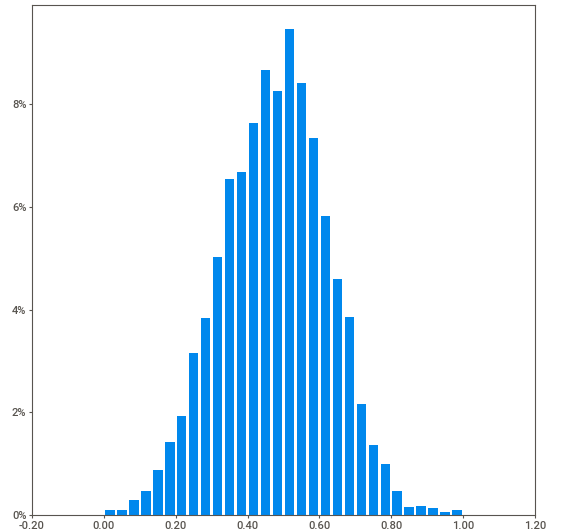
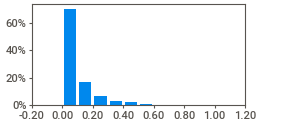
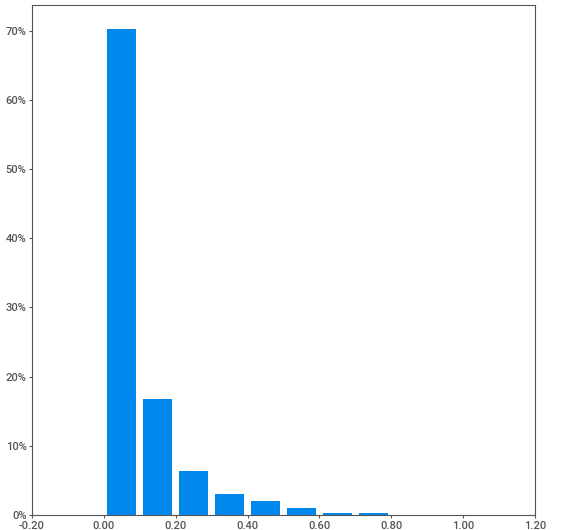
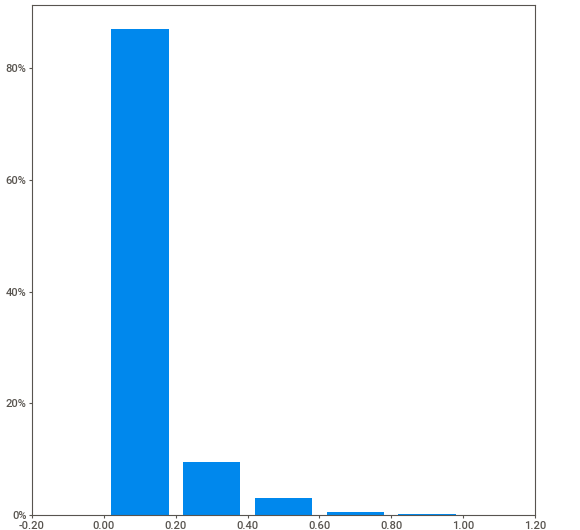
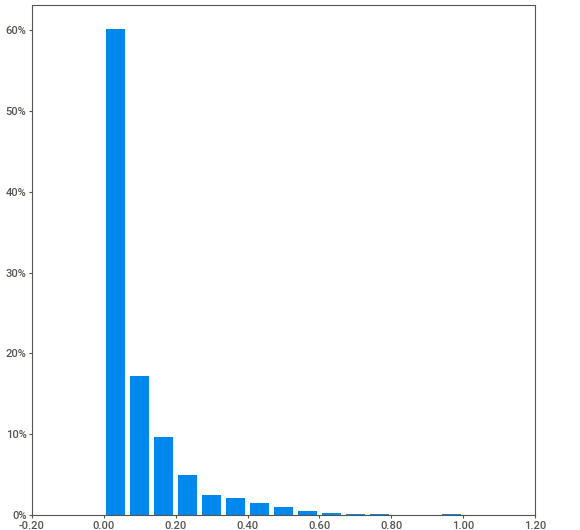
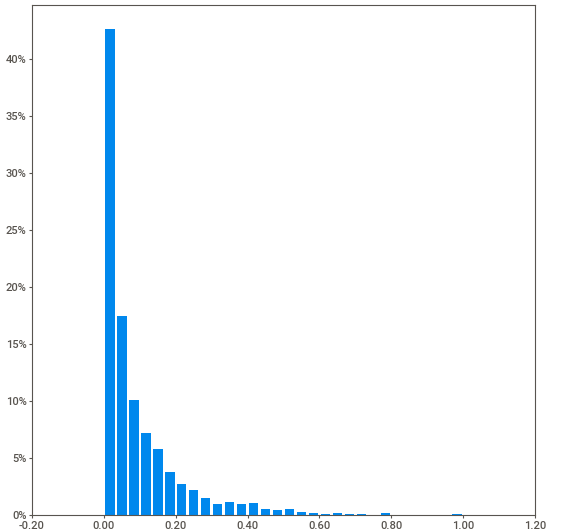
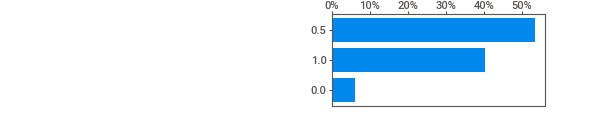
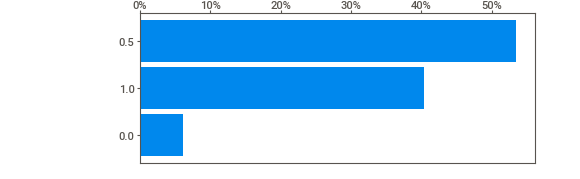
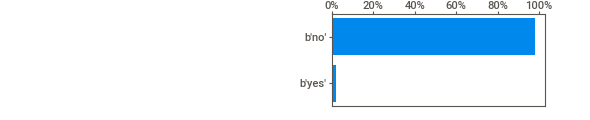
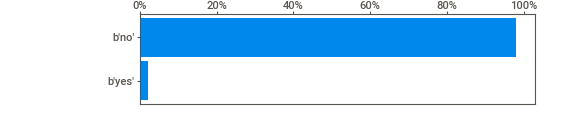
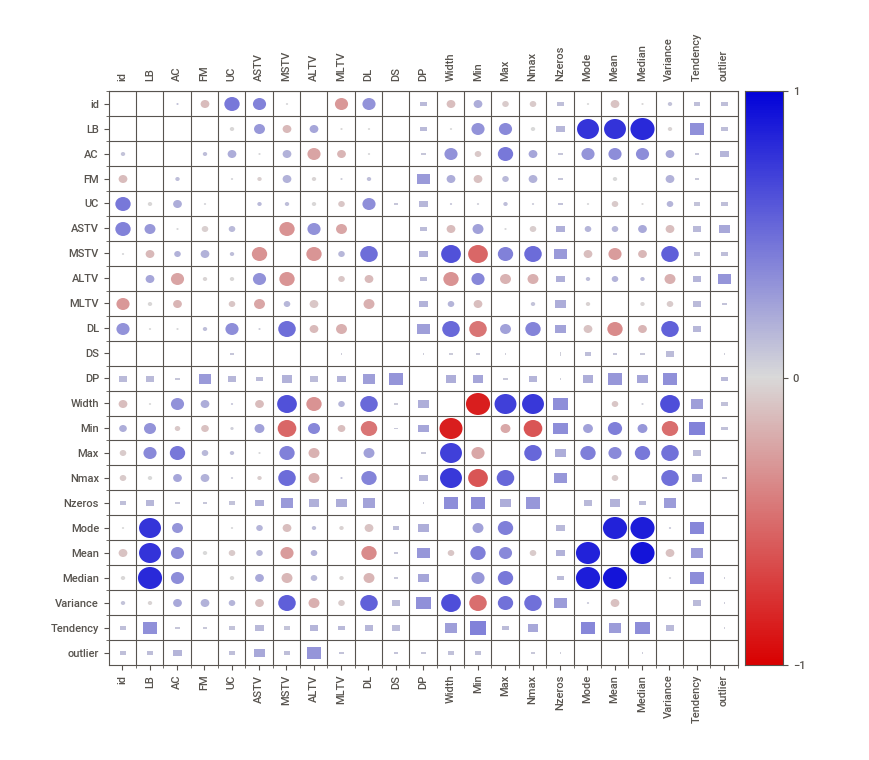
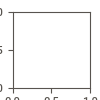

In [ ]:
sweet_report.show_notebook(w=1200, h=1000, scale=1)

In [ ]:
df['outlier'] = df['outlier'].replace({"b'no'": 0, "b'yes'": 1})

In [ ]:
df.sort_values(by='id', inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)


In [ ]:
df.columns

Index(['id', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'outlier'],
      dtype='object')

In [ ]:
df.head(50)

id        LB        AC        FM        UC      ASTV      MSTV  \
6780    1.0  0.259259  0.000000  0.000000  0.000000  0.847222  0.044118   
11833   1.0  0.259259  0.000000  0.000000  0.000000  0.859155  0.044118   
5097    2.0  0.481481  0.153846  0.000000  0.235294  0.070423  0.279412   
1721    2.0  0.481481  0.153846  0.000000  0.235294  0.066667  0.279412   
15225   2.0  0.481481  0.153846  0.000000  0.235294  0.066667  0.279412   
13537   2.0  0.481481  0.153846  0.000000  0.235294  0.070423  0.279412   
8473    2.0  0.481481  0.153846  0.000000  0.173913  0.067568  0.279412   
33      2.0  0.481481  0.153846  0.000000  0.235294  0.070423  0.279412   
6785    2.0  0.481481  0.153846  0.000000  0.235294  0.069444  0.279412   
11849   2.0  0.481481  0.153846  0.000000  0.235294  0.070423  0.279412   
3409    2.0  0.481481  0.153846  0.000000  0.235294  0.069444  0.279412   
10161   2.0  0.481481  0.153846  0.000000  0.235294  0.067568  0.279412   
34      3.0  0.500000  0.076923  0.000000  0.294118  0.056338  0.279412   
3410    3.0  0.500000  0.076923  0.000000  0.294118  0.055556  0.279412   
6786    3.0  0.500000  0.076923  0.000000  0.294118  0.055556  0.279412   
8474    3.0  0.500000  0.076923  0.000000  0.217391  0.054054  0.279412   
13538   3.0  0.500000  0.076923  0.000000  0.294118  0.056338  0.279412   
15226   3.0  0.500000  0.076923  0.000000  0.294118  0.053333  0.279412   
5098    3.0  0.500000  0.076923  0.000000  0.294118  0.056338  0.279412   
10162   3.0  0.500000  0.076923  0.000000  0.294118  0.054054  0.279412   
11850   3.0  0.500000  0.076923  0.000000  0.294118  0.056338  0.279412   
1722    3.0  0.500000  0.076923  0.000000  0.294118  0.053333  0.279412   
15227   4.0  0.518519  0.076923  0.000000  0.352941  0.053333  0.323529   
3411    4.0  0.518519  0.076923  0.000000  0.352941  0.055556  0.323529   
10163   4.0  0.518519  0.076923  0.000000  0.352941  0.054054  0.323529   
11851   4.0  0.518519  0.076923  0.000000  0.352941  0.056338  0.323529   
6787    4.0  0.518519  0.076923  0.000000  0.352941  0.055556  0.323529   
8475    4.0  0.518519  0.076923  0.000000  0.260870  0.054054  0.323529   
13539   4.0  0.518519  0.076923  0.000000  0.352941  0.056338  0.323529   
1723    4.0  0.518519  0.076923  0.000000  0.352941  0.053333  0.323529   
35      4.0  0.518519  0.076923  0.000000  0.352941  0.056338  0.323529   
5099    4.0  0.518519  0.076923  0.000000  0.352941  0.056338  0.323529   
1724    5.0  0.481481  0.153846  0.000000  0.294118  0.053333  0.323529   
5100    5.0  0.481481  0.153846  0.000000  0.294118  0.056338  0.323529   
15228   5.0  0.481481  0.153846  0.000000  0.294118  0.053333  0.323529   
13540   5.0  0.481481  0.153846  0.000000  0.294118  0.056338  0.323529   
3412    5.0  0.481481  0.153846  0.000000  0.294118  0.055556  0.323529   
8476    5.0  0.481481  0.153846  0.000000  0.217391  0.054054  0.323529   
6788    5.0  0.481481  0.153846  0.000000  0.294118  0.055556  0.323529   
11852   5.0  0.481481  0.153846  0.000000  0.294118  0.056338  0.323529   
10164   5.0  0.481481  0.153846  0.000000  0.294118  0.054054  0.323529   
36      5.0  0.481481  0.153846  0.000000  0.294118  0.056338  0.323529   
15195   8.0  0.296296  0.000000  0.000000  0.000000  0.946667  0.044118   
15215   9.0  0.296296  0.000000  0.000000  0.058824  0.960000  0.044118   
6783    9.0  0.296296  0.000000  0.000000  0.058824  1.000000  0.044118   
10146  12.0  0.814815  0.000000  0.000000  0.058824  0.702703  0.264706   
8470   12.0  0.814815  0.000000  0.000000  0.043478  0.702703  0.264706   
37     13.0  0.462963  0.153846  0.101064  0.352941  0.225352  0.176471   
6789   13.0  0.462963  0.153846  0.101064  0.352941  0.222222  0.176471   
3413   13.0  0.462963  0.153846  0.101064  0.352941  0.222222  0.176471   

           ALTV      MLTV        DL  ...       Min       Max      Nmax  \
6780   0.511905  0.047337  0.000000  ...  0.110092  0.034483  0.111111   
11833  0.511905  0.047337  0.000000

It seems that for each patient ID we have multiple information with only  'width', 'mode' 'mean' , 'median' and ' variance' columns actually contain different information everything else is repeated. For the sake of this exercise and computational power I'm grouping the entire dataframe to contain the mean values

In [ ]:
grouped_df = df.groupby("id").mean()

In [ ]:
grouped_df.shape

(1902, 22)

In [ ]:
grouped_df.head()

LB        AC   FM        UC      ASTV      MSTV      ALTV  \
id                                                                     
1.0  0.259259  0.000000  0.0  0.000000  0.853189  0.044118  0.511905   
2.0  0.481481  0.153846  0.0  0.229156  0.068905  0.279412  0.000000   
3.0  0.500000  0.076923  0.0  0.286445  0.055124  0.279412  0.000000   
4.0  0.518519  0.076923  0.0  0.343734  0.055124  0.323529  0.000000   
5.0  0.481481  0.153846  0.0  0.286445  0.055124  0.323529  0.000000   

         MLTV        DL   DS  ...       Min       Max      Nmax  Nzeros  \
id                            ...                                         
1.0  0.047337  0.000000  0.0  ...  0.110092  0.034483  0.111111     0.0   
2.0  0.205128  0.141071  0.0  ...  0.165138  0.655172  0.333333     0.1   
3.0  0.264300  0.141071  0.0  ...  0.165138  0.655172  0.277778     0.1   
4.0  0.453649  0.141071  0.0  ...  0.027523  0.413793  0.611111     0.0   
5.0  0.392505  0.000000  0.0  ...  0.027523  0.413793  0.500000     0.0   

         Mode      Mean    Median  Variance  Tendency  outlier  
id                                                              
1.0  0.437113  0.540769  0.310269  0.341902       1.0      1.0  
2.0  0.588660  0.534826  0.492217  0.062347       0.5      0.0  
3.0  0.588660  0.524714  0.470140  0.067543       0.5      0.0  
4.0  0.552891  0.514601  0.459101  0.067543       1.0      0.0  
5.0  0.552891  0.534826  0.470140  0.057152       1.0      0.0  

[5 rows x 22 columns]

In [ ]:
covariance_inverse = np.linalg.inv(np.cov(grouped_df.T))
codense = pdist(grouped_df, metric='mahalanobis', VI=covariance_inverse)
distance = squareform(codense)
distance[0, 21]

8.078280273397993

we can use the code above to check mahalanobis distance or alternativley we can make a matrix that conveys all the distances as below:

In [ ]:
distance_matrix = pd.DataFrame(squareform(pdist(grouped_df, metric='mahalanobis', VI=covariance_inverse)))
distance_matrix.columns = distance_matrix.index = grouped_df.index
distance_matrix

id         1.0        2.0        3.0        4.0        5.0        8.0     \
id                                                                         
1.0      0.000000   9.603205   9.700074   9.918543   9.243980   7.160522   
2.0      9.603205   0.000000   1.143899   5.232183   4.391198   8.241926   
3.0      9.700074   1.143899   0.000000   5.366624   4.591171   8.250390   
4.0      9.918543   5.232183   5.366624   0.000000   1.826220   8.762759   
5.0      9.243980   4.391198   4.591171   1.826220   0.000000   8.098619   
8.0      7.160522   8.241926   8.250390   8.762759   8.098619   0.000000   
9.0      6.977727   7.823510   7.744205   8.516414   7.781029   2.202106   
12.0     9.382347   6.692402   6.473484   6.075216   5.787456   6.628797   
13.0     8.877150   4.665692   4.915282   3.824826   3.535411   7.707673   
14.0     8.961623   5.655821   5.841382   7.163296   6.212244   7.933505   
15.0    15.924072  14.482388  14.550306  14.787930  14.732249  15.706415   
16.0    11.232094   8.539429   8.593866   9.747244   9.251490  10.691163   
17.0    11.540277   9.326443   9.288051  10.150859   9.708661  10.931626   
19.0    11.894261   9.845755   9.891555  10.108960   9.825160  11.551237   
20.0    17.846336  16.330465  16.363560  17.070725  16.933101  17.536811   
21.0    14.083599  12.442841  12.513253  12.109180  12.040326  13.379768   
22.0    12.019864   8.305274   8.484633   9.522650   9.144951  11.471897   
24.0     8.322298   8.037062   8.189752   8.486272   7.909719   4.396274   
25.0     9.102089   9.407174   9.541660   9.988181   9.463650   7.594284   
26.0     7.602112   7.365404   7.713053   8.060839   7.551399   6.044113   
27.0     7.998652   6.947672   7.241160   8.122810   7.610331   7.140886   
28.0     8.078280   8.225735   8.492166   9.049687   8.530937   6.143359   
29.0    10.201111   8.359020   8.508319   9.210286   9.170923   9.185482   
30.0    11.041179   9.298873   9.287171   9.539521   9.346871  11.557640   
31.0    11.119824   8.107305   8.118838   8.457415   8.785833  10.695607   
32.0    12.206516  10.148791  10.128795  10.209188  10.130629  12.657787   
33.0     9.818958   4.681174   4.905229   5.257471   5.584049   8.755438   
34.0    10.568813   7.287590   7.705843   5.646271   5.656586   9.605130   
35.0     8.580180   4.130116   4.600889   5.367802   4.529550   7.686565   
36.0    10.219185   5.930439   5.937885   4.924914   4.567174   9.068745   
37.0     9.684447   5.238352   5.345388   4.891080   4.624100   8.475873   
38.0     9.152952   3.854708   4.016487   4.766156   4.094256   7.941342   
39.0     9.487003   4.624718   4.747892   5.053294   4.288733   8.183980   
40.0     9.042968   4.027892   4.293058   5.295081   4.190962   7.811529   
41.0     8.849217   5.545378   5.893788   5.568607   4.863213   7.854492   
42.0     8.823483   3.495568   3.450275   5.272105   4.150551   7.598752   
43.0     7.539402   4.885781   5.142370   4.931453   4.106924   6.376395   
44.0     9.861937   4.526983   4.938717   5.521368   5.098643   8.858380   
45.0    10.399481   5.177995   5.049381   6.576090   6.009542   9.223680   
46.0    10.655944   5.515214   5.484318   6.451349   5.950605   9.553385   
47.0    10.967795   6.624474   6.686403   5.312399   5.332375  10.261990   
48.0    10.349528   6.301544   6.344448   5.513622   5.226714   9.681589   
49.0    11.176603   9.214266   9.126517   9.340569   8.821108  11.196479   
50.0     9.833915   4.830121   4.800311   4.160042   3.750468   8.997360   
51.0    10.198001   4.744305   4.860864   5.037469   4.925533   9.369401   
52.0    10.167729   6.911706   6.563829   6.096109   5.929972   9.417693   
54.0     8.239097   5.374766   5.517219   6.212511   5.821498   6.940382   
55.0     8.476526   5.974701   6.307110   6.125112   5.764693   8.107313   
57.0     9.332272   5.546384   5.945789   5.065779   4.907327   8.365745   
58.0     8.912397   4.656832   4.863829   5.831622   5.434384   9.087305   
59.0     8.844634   4.370363   4.510306   5.4185

In [ ]:
grouped_df['outlier'].value_counts()

0.0    1655
1.0     247
Name: outlier, dtype: int64

There's about 15% of outliers in our dataset, let's try using mahalanobis distance to predic them and see how accurate that will be 

In [ ]:
mean_vec = np.mean(grouped_df, axis=0)
mahalanobis_dist = np.sqrt(np.sum(np.dot((grouped_df - mean_vec), covariance_inverse) * (grouped_df - mean_vec), axis=1))

# Rank the rows based on their Mahalanobis distance and identify the top 15% as outliers
n_outliers = int(0.15 * len(mahalanobis_dist))
outlier_indices = np.argsort(mahalanobis_dist)[-n_outliers:]

# Check the results against the 'outlier' column
ground_truth = grouped_df['outlier'].values
predicted_outliers = np.zeros(len(ground_truth))
predicted_outliers[outlier_indices] = 1
accuracy = np.sum(predicted_outliers == ground_truth) / len(ground_truth)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.13


Snippet of code below is to create a report for all the models to be tested

In [ ]:
def evaluate_model(y_true, y_pred, X, model_name, results_df):

    report = classification_report(y_true, y_pred, output_dict=True)
    ch_score = calinski_harabasz_score(X, y_pred)
    sil_score = silhouette_score(X, y_pred)
    
    results = {
        'model': model_name,
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'calinski_harabasz_score': ch_score,
        'silhouette_score': sil_score
    }
    results_df = results_df.append(results, ignore_index=True)
    return results_df

In [ ]:
results_df = pd.DataFrame()

#SVM

In [ ]:
X = grouped_df.drop(['outlier'], axis=1)
y = grouped_df['outlier']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dim_reducer = PCA(n_components=2)
x_reduced = dim_reducer.fit_transform(X_test)
x_reduced.shape

(381, 2)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
results_df = evaluate_model(y_test, svm_preds, X_test, 'SVM', results_df)

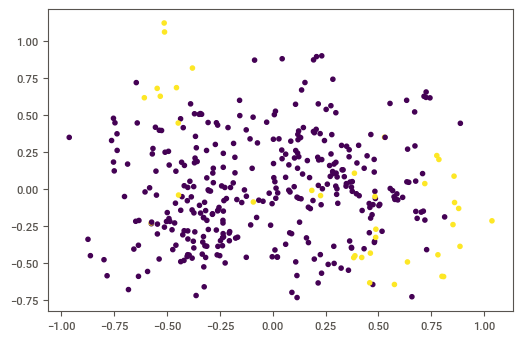

In [ ]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=svm_preds)

#LogReg

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
results_df = evaluate_model(y_test, logreg_preds, X_test, 'Logistic Regression', results_df)


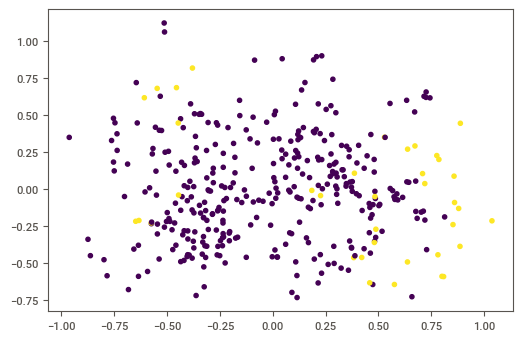

In [ ]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=logreg_preds)

#KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
results_df = evaluate_model(y_test, knn_preds, X_test, 'KNN', results_df)

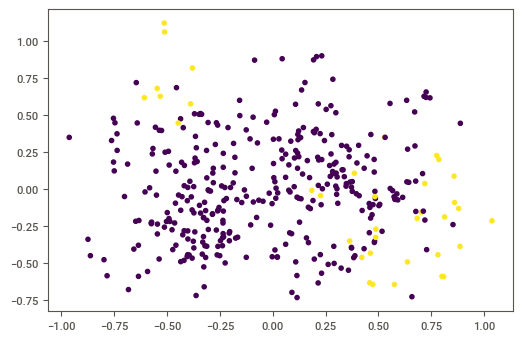

In [ ]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=knn_preds)

#One-Class SVM

In [ ]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.1)
ocsvm.fit(X_train)
ocsvm_preds = ocsvm.predict(X_test)
results_df = evaluate_model(y_test, ocsvm_preds, X_test, 'One-Class SVM', results_df)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

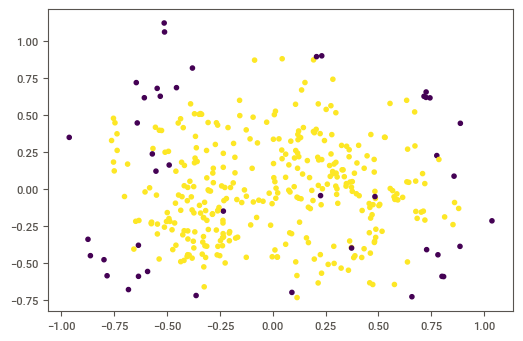

In [ ]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=ocsvm_preds)

#Isolation Forest

In [ ]:
iforest = IsolationForest(n_estimators=100)
iforest.fit(X_train)
iforest_preds = iforest.predict(X_test)
results_df = evaluate_model(y_test, iforest_preds, X_test, 'Isolation Forest', results_df)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

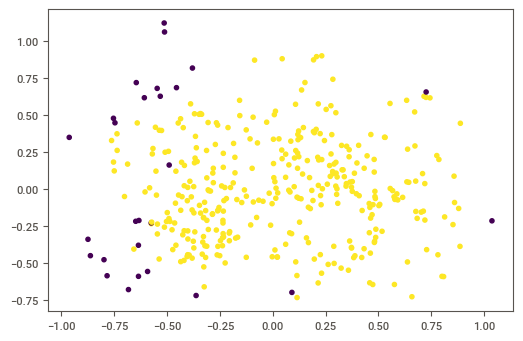

In [ ]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=iforest_preds)

In [ ]:
results_df

model  accuracy  precision    recall  f1-score  \
0                  SVM  0.939633   0.936807  0.939633  0.935704   
1  Logistic Regression  0.902887   0.894301  0.902887  0.896567   
2                  KNN  0.942257   0.940092  0.942257  0.938155   
3        One-Class SVM  0.083990   0.012424  0.083990  0.021647   
4     Isolation Forest  0.104987   0.014829  0.104987  0.025987   

   calinski_harabasz_score  silhouette_score  
0                21.501893          0.214210  
1                26.348466          0.210546  
2                21.632576          0.208064  
3                 7.781784          0.258846  
4                20.535709          0.289385

The gap between supervised and unsupervised models is IMMENSE, we have to do some tuning of hyperparameters for the unsupervised models

# Hyperparameters tuning for unsupervised learning

different scoring methods tried for oneclasssvm:
- adjusted_rand_score : results weren't great, accuracy was pretty much the same, other metrics worse
- fowlkes_mallows_score - improved precision and f1, others the same
- completeness_score - exactly same paramteres as fowlkes_mallows_score returned
- normalized_mutual_info_score - same results as adjusted_rand
- homogeneity_score - horrible results, much worse than without tuning
- v_measure_score - same result as adjusted_rand_score


In [ ]:
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'nu': [0.1, 0.3, 0.5, 0.7, 0.9],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]}
              
clf = OneClassSVM()
grid_search = GridSearchCV(clf, parameters, scoring='fowlkes_mallows_score', cv=10)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'gamma': 10, 'kernel': 'sigmoid', 'nu': 0.5}
Best score: 0.8791207171538151


In [ ]:
ocsvm = OneClassSVM(kernel='sigmoid', nu=0.5, gamma = 10)
ocsvm.fit(X_train)
ocsvm_preds = ocsvm.predict(X_test)
results_df = evaluate_model(y_test, ocsvm_preds, X_test, 'Tuned One-Class SVM', results_df)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

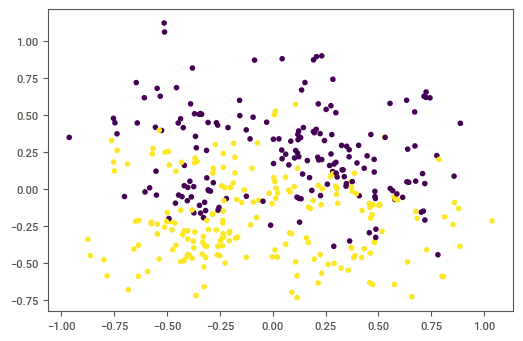

In [ ]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=ocsvm_preds)

different scoring methods tried for isolation forest:

- adjusted_rand_score - no improvement, silhouette worse
- fowlkes_mallows_score - no improvement, calinski harabasz  worse
- completeness_score - slight improvement in accuracy, much worse clustering
- normalized_mutual_info_score - same parameters as fowlkes, worse across the board
- homogeneity_score - same parameters as before

most of the time the parameters vere very similar with mostly contamination rate changing.

In [ ]:
n_estimators = [10, 50, 100, 150, 200]
max_samples = [0.1, 0.3, 0.5, 0.7, 0.9]
contamination = [0.05, 0.1, 0.15, 0.2]

parameters = {'n_estimators': n_estimators,
              'max_samples': max_samples,
              'contamination': contamination}
              
clf = IsolationForest(random_state=42)
random_search = RandomizedSearchCV(clf, parameters, n_iter=100, scoring='fowlkes_mallows_score', cv=25, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but I

Best parameters: {'n_estimators': 10, 'max_samples': 0.1, 'contamination': 0.05}
Best score: 0.8707203342458776


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
iforest = IsolationForest(n_estimators=10, max_samples = 0.1, contamination = 0.15)
iforest.fit(X_train)
iforest_preds = iforest.predict(X_test)
results_df = evaluate_model(y_test, iforest_preds, X_test, 'Tuned Isolation Forest', results_df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.p

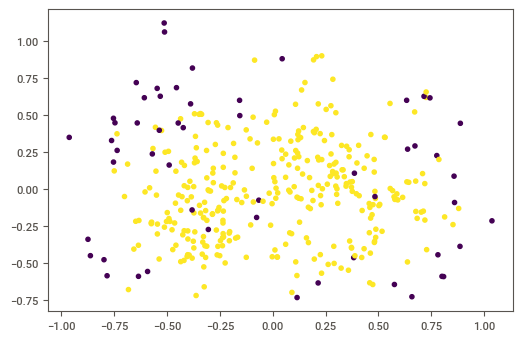

In [ ]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=iforest_preds)

In [ ]:
results_df

model  accuracy  precision    recall  f1-score  \
0                     SVM  0.939633   0.936807  0.939633  0.935704   
1     Logistic Regression  0.902887   0.894301  0.902887  0.896567   
2                     KNN  0.942257   0.940092  0.942257  0.938155   
3           One-Class SVM  0.083990   0.012424  0.083990  0.021647   
4        Isolation Forest  0.104987   0.014829  0.104987  0.025987   
5     Tuned One-Class SVM  0.070866   0.017369  0.070866  0.027900   
6  Tuned Isolation Forest  0.068241   0.010466  0.068241  0.018149   

   calinski_harabasz_score  silhouette_score  
0                21.501893          0.214210  
1                26.348466          0.210546  
2                21.632576          0.208064  
3                 7.781784          0.258846  
4                20.535709          0.289385  
5                46.240847          0.108083  
6                11.963484          0.214407

The difference between supervised and non-supervised methods is apparent and obvious. Supervised models achieve much better scores in accuracy, precision recall and f-1 scores but the clustering as measured by calinski-harabasz and silhouettte score is not that much different and falls within similar range.

Among the supervised models KNN reigns superior with highest marks across all scores with SVM following very closely after. Logistic Regression did worst of the three but seems to have achieved more clear cut clusters as indicated by higher calinski_harabasz score

When it comes to unsupervised models, without tuning isolation forest is a clear winner with better custers, and better scores across the board. It seems though that tuning of hyperparameters does much more for One-Class SVM.
The variation of Isolation Forest does not allow for consitent evaluation of the model as every time it's run with the same parameters the clusters will be a bit different and so will the scores.

One-Class SVM on the other hand after tuning largely increased precision, recall at the cost of a bit lower accuracy. As can be clearly seen in the visualisation the model after tuning started classifying a lot more instances as outliers. Both did so after tuning but one-class SVM was particularly bad for this.

From unsupervised models if i had to pick one I'd go with isolated forest but without tuning. Then again - the tuned model did particularly bad in the last run but because isolation forest does not return the same result every time - this was a particularly bad one, there were better ones.